In [1]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime, timedelta, timezone
import statsmodels.api as sm
from scipy.stats import pearsonr
from mplfinance.original_flavor import candlestick_ochl
from matplotlib.dates import date2num, num2date
import matplotlib.dates
plt.style.use('ggplot')
# pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv("etf.csv", parse_dates=True, index_col='Date')
data = pd.read_csv("BTCUSDT_1m_klines.csv", parse_dates=True, index_col='Timestamp')

C:\Users\User\AppData\Local\Temp\ipykernel_4000\3475852820.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("etf.csv", parse_dates=True, index_col='Date')


In [3]:
df

,IBIT,FBTC,BITB,ARKB,BTCO,EZBC,BRRR,HODL,BTCW,GBTC,Total
Date,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-11,111.7,227,237.9,65.3,17.4,50.1,29.4,10.6,1,-95.1,655.3
2024-01-12,386,195.3,17.4,39.8,28.4,0,20.2,0,0,-484.1,203
2024-01-15,-,-,-,-,-,-,-,-,-,-,0
2024-01-16,212.7,102,50.2,122.3,31.9,0,15.3,7.3,0,-594.4,-52.7
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07,0,4.1,0,2.8,6,0,0,0,0,-28.6,-15.7
2024-05-08,0,0,11.5,0,0,0,0,0,0,0,11.5
2024-05-09,14.2,2.7,6.8,4.4,2.2,1.8,0,0,0,-43.4,-11.3


In [4]:
data = data.dropna()

In [5]:

# api_key = 'your_api_key'
# api_secret = 'your_api_secret'


# symbols = [ 'BTCUSDT']
# start_time = datetime(2024, 1, 11, tzinfo=timezone.utc)
# end_time = datetime(2024, 5, 14, tzinfo=timezone.utc)

# # Binance API 端點
# base_url = 'https://fapi.binance.com'

# # 設定每次請求的條數
# limit = 1000

# for symbol in symbols:
#     current_start_time = start_time
#     csv_filename = f'{symbol}_1m_klines.csv'

#     with open(csv_filename, mode='w', newline='') as csv_file:
#         csv_writer = csv.writer(csv_file)
#         csv_writer.writerow(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'])  # 新增 Volume 欄位

#         while current_start_time < end_time:
#             endpoint = f'/fapi/v1/klines'
#             params = {
#                 'symbol': symbol,
#                 'interval': '1m',
#                 'startTime': int(current_start_time.timestamp()) * 1000,
#                 'limit': limit
#             }

#             response = requests.get(base_url + endpoint, params=params)
#             kline_data = response.json()

#             if not kline_data:
#                 break  

            
#             for kline in kline_data:
#                 timestamp = datetime.utcfromtimestamp(kline[0] / 1000).replace(tzinfo=timezone.utc)
#                 open_price = float(kline[1])
#                 high_price = float(kline[2])
#                 low_price = float(kline[3])
#                 close_price = float(kline[4])
#                 volume = float(kline[5])  

#                 csv_writer.writerow([timestamp, open_price, high_price, low_price, close_price, volume])

            
#             current_start_time = datetime.utcfromtimestamp(kline_data[-1][0] / 1000).replace(tzinfo=timezone.utc) + timedelta(minutes=1)

#     print(f'{csv_filename} 已建立')

### d

In [6]:
rule = '1d'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data2 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data2

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,49027.5,45600.0,46337.8,596698.379
2024-01-12 00:00:00+00:00,46337.9,46536.2,41370.0,42788.9,575943.258
2024-01-13 00:00:00+00:00,42789.0,43273.4,42445.7,42846.4,207737.326
2024-01-14 00:00:00+00:00,42846.4,43096.1,41713.5,41734.9,181096.968
2024-01-15 00:00:00+00:00,41734.9,43376.0,41720.0,42515.0,240059.141
...,...,...,...,...,...
2024-05-10 00:00:00+00:00,63050.0,63446.5,60117.4,60778.1,307214.960
2024-05-11 00:00:00+00:00,60778.0,61491.4,60432.6,60809.2,113294.787
2024-05-12 00:00:00+00:00,60809.2,61849.4,60557.3,61455.8,104043.897


In [7]:
df.replace("-", float('NaN'), inplace=True)
df.dropna(how='all', inplace=True)

In [8]:
df = df.drop(pd.to_datetime('2024-01-15'), errors='ignore')
df

,IBIT,FBTC,BITB,ARKB,BTCO,EZBC,BRRR,HODL,BTCW,GBTC,Total
Date,,,,,,,,,,,
2024-01-11,111.7,227,237.9,65.3,17.4,50.1,29.4,10.6,1,-95.1,655.3
2024-01-12,386,195.3,17.4,39.8,28.4,0,20.2,0,0,-484.1,203
2024-01-16,212.7,102,50.2,122.3,31.9,0,15.3,7.3,0,-594.4,-52.7
2024-01-17,371.4,358.1,68.2,50.3,57.6,1.2,1.2,4.8,1.6,-460.6,453.8
2024-01-18,145.5,177.9,20.1,41.8,58.8,0,9.3,2.3,0,-582.3,-126.6
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-07,0,4.1,0,2.8,6,0,0,0,0,-28.6,-15.7
2024-05-08,0,0,11.5,0,0,0,0,0,0,0,11.5
2024-05-09,14.2,2.7,6.8,4.4,2.2,1.8,0,0,0,-43.4,-11.3


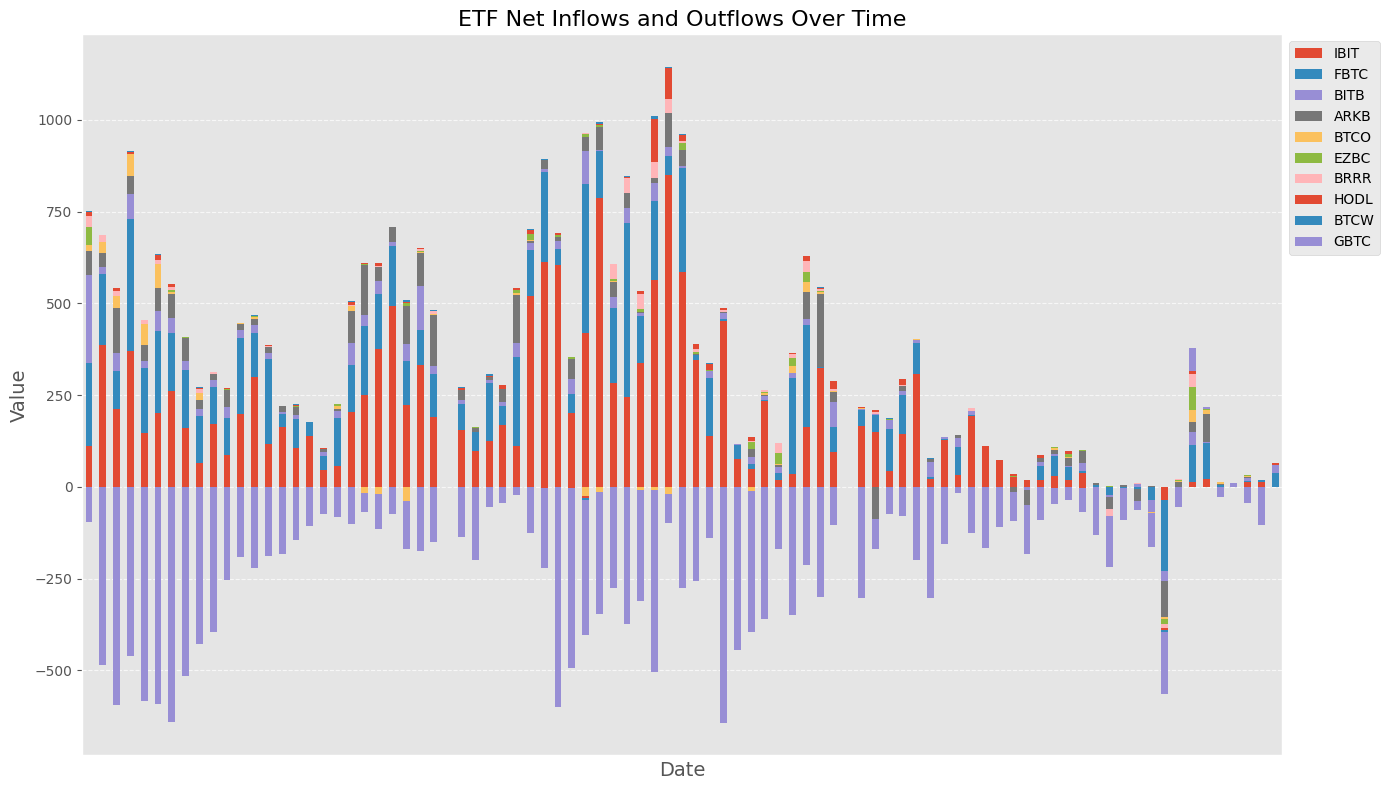

In [9]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

dfbar = df.drop(columns=['Total'])
ax = dfbar.plot(kind='bar', figsize=(14, 8), stacked=True)
ax.set_title('ETF Net Inflows and Outflows Over Time', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Value', fontsize=14)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.xticks([])
plt.tight_layout()
plt.show()

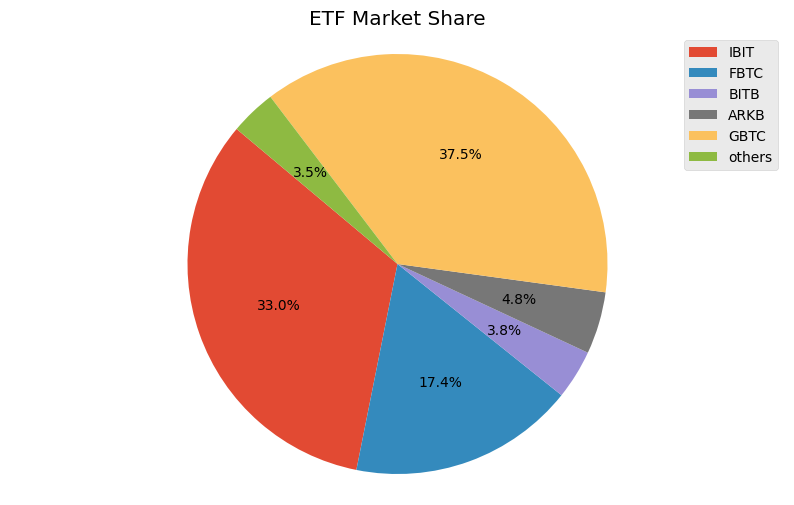

In [10]:
total_per_etf = dfbar.sum()
total_per_etf = total_per_etf.abs()
total_per_etf['others'] = total_per_etf[['BTCO', 'EZBC', 'BRRR', 'HODL', 'BTCW']].sum()
total_per_etf = total_per_etf.drop(['BTCO', 'EZBC', 'BRRR', 'HODL', 'BTCW'])


plt.figure(figsize=(10, 6))
patches, texts, autotexts = plt.pie(total_per_etf, labels=['' for _ in total_per_etf.index], autopct='%1.1f%%', startangle=140)
plt.title('ETF Market Share')
plt.axis('equal')  
plt.legend(total_per_etf.index, loc='upper right')
plt.show()

In [11]:
# etf_columns = ['IBIT', 'FBTC', 'BITB', 'ARKB', 'BTCO', 'EZBC', 'BRRR', 'HODL', 'BTCW', 'GBTC']
# df[etf_columns] = df[etf_columns].abs()  
# market_share = df[etf_columns].div(df[etf_columns].sum(axis=1), axis=0)

# plt.figure(figsize=(14, 8))
# market_share.plot(kind='area', stacked=True, alpha=0.6, figsize=(14, 8))

# plt.title('ETF Market Share Over Time')
# plt.xlabel('Date')
# plt.ylabel('Market Share')
# plt.legend(loc='upper right')
# plt.grid(True)
# plt.show()

### 1h

In [12]:
rule = '1h'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data3 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data3

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46729.8,46308.0,46676.0,16224.974
2024-01-11 01:00:00+00:00,46676.1,46758.0,46467.5,46506.7,8533.071
2024-01-11 02:00:00+00:00,46506.7,46635.0,46494.4,46567.4,4211.690
2024-01-11 03:00:00+00:00,46567.4,46599.7,46146.5,46502.4,11793.367
2024-01-11 04:00:00+00:00,46502.3,46511.4,46296.4,46404.9,5472.494
...,...,...,...,...,...
2024-05-14 03:00:00+00:00,62529.2,62678.3,62377.2,62464.8,8140.943
2024-05-14 04:00:00+00:00,62464.8,62650.0,62381.7,62524.0,5359.938
2024-05-14 05:00:00+00:00,62523.9,62749.9,62463.0,62693.9,5027.458


In [13]:
data3.index = pd.to_datetime(data3.index)
daily_01am_data = data3[data3.index.strftime('%H:%M:%S') == '01:00:00']
daily_01am_data.index = daily_01am_data.index.date
daily_01am_data

,Open,High,Low,Close,Volume
2024-01-11,46676.1,46758.0,46467.5,46506.7,8533.071
2024-01-12,46299.0,46343.7,45900.9,46144.8,10054.734
2024-01-13,42803.1,42900.0,42523.0,42688.1,13812.223
2024-01-14,42691.2,42843.1,42680.0,42771.9,3428.661
2024-01-15,42287.1,42411.7,42178.6,42280.9,6897.811
...,...,...,...,...,...
2024-05-10,62818.5,62943.8,62633.2,62850.8,7041.955
2024-05-11,60753.7,61079.4,60734.4,60840.7,6493.295
2024-05-12,60951.9,61059.9,60824.6,60840.7,2307.067
2024-05-13,61485.5,61528.1,61155.3,61394.0,8687.971


In [14]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_01am_data = daily_01am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [15]:
daily_01am_data

,Open,High,Low,Close,Volume
2024-01-11,46676.1,46758.0,46467.5,46506.7,8533.071
2024-01-12,46299.0,46343.7,45900.9,46144.8,10054.734
2024-01-16,42604.6,42733.7,42556.6,42591.7,4728.842
2024-01-17,43089.5,43198.0,42953.0,42965.4,6154.108
2024-01-18,42671.1,42723.8,42515.0,42595.2,4987.178
...,...,...,...,...,...
2024-05-07,63511.1,63950.0,63442.0,63861.1,9206.869
2024-05-08,62565.9,62700.0,62391.5,62500.1,4849.041
2024-05-09,61367.9,61553.9,61344.0,61528.9,5401.329
2024-05-10,62818.5,62943.8,62633.2,62850.8,7041.955


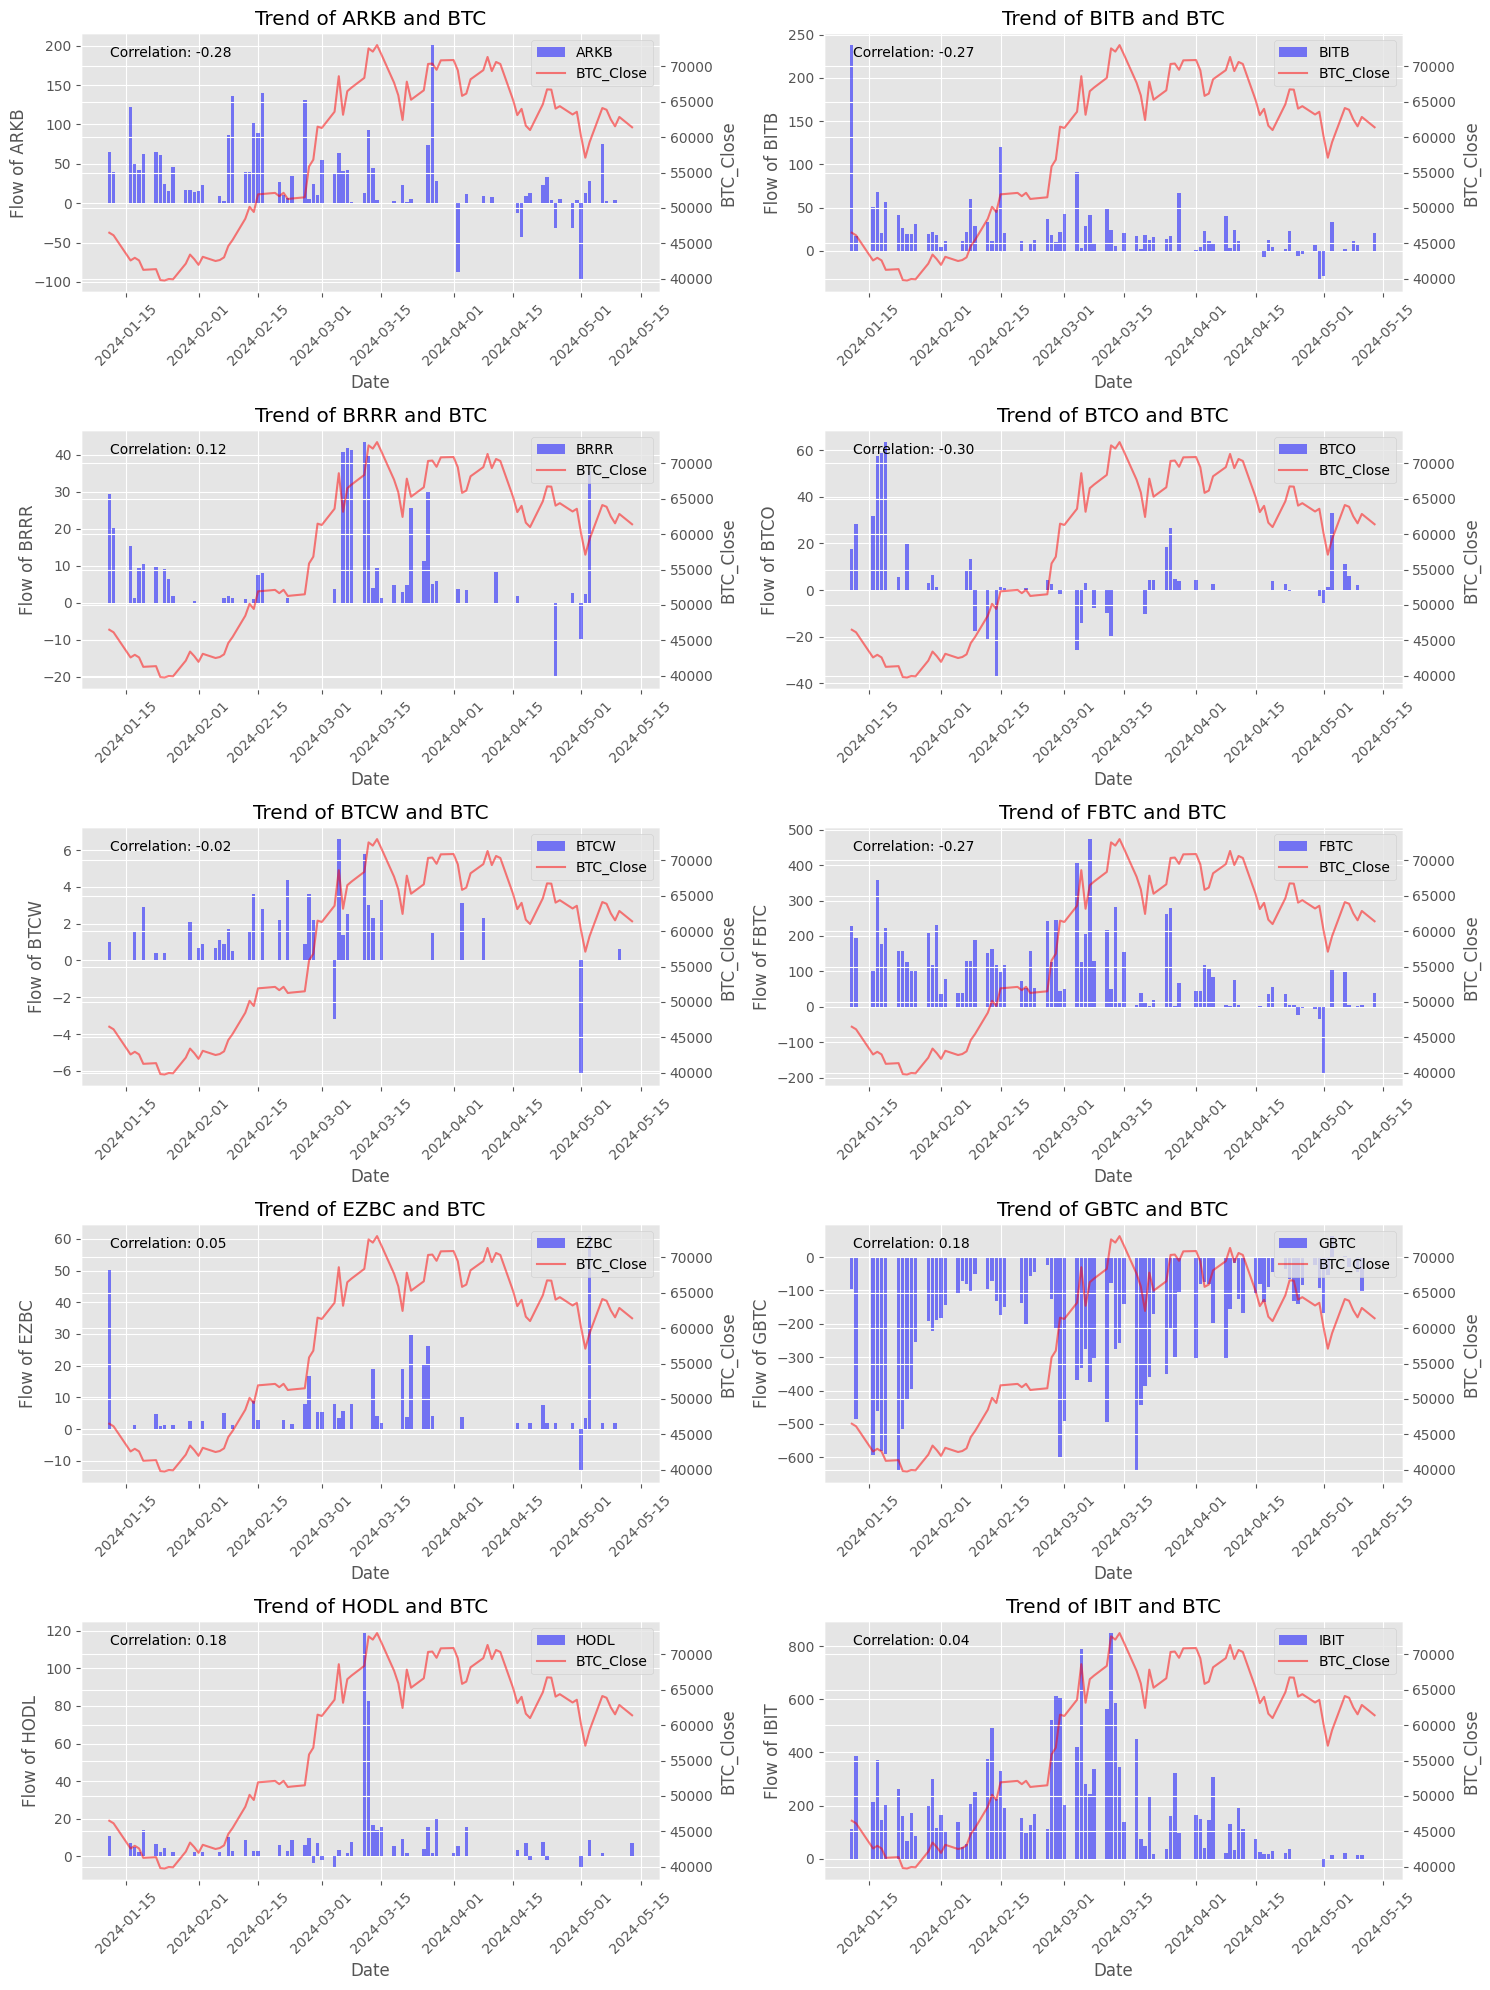

In [16]:
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']
correlations = df[columns_to_plot].corrwith(daily_01am_data['Close'])

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for i, col in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    ax.bar(df.index, df[col], alpha=0.5, label=col, color='blue')
    
    ax2 = ax.twinx()
    ax2.plot(df.index, daily_01am_data['Close'], alpha=0.5, label='BTC_Close', color='red')
    
    ax.set_title(f'Trend of {col} and BTC')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'Flow of {col}')
    ax2.set_ylabel('BTC_Close')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
    
    ax.grid(True)
    correlation = correlations[col]
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [17]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_01am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

pvalues = model.pvalues
params = model.params

significant_etfs = pvalues[pvalues < 0.1].index
significant_params = params[significant_etfs]

results_df = pd.DataFrame({
    'ETF': significant_etfs,
    'Coefficient': significant_params,
    'P-Value': pvalues[significant_etfs]
})

results_df = results_df[results_df['ETF'] != 'const']
results_df.set_index('ETF', inplace=True)  
results_df['1h'] = 1
results_df

,Coefficient,P-Value,1h
ETF,,,
ETF_Flow_ARKB,-47.333314,0.084384,1
ETF_Flow_BITB,-76.630157,0.059438,1
ETF_Flow_BTCO,-146.724196,0.078131,1


### 2h

In [18]:
rule = '2h'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data4 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data4

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,46308.0,46506.7,24758.045
2024-01-11 02:00:00+00:00,46506.7,46635.0,46146.5,46502.4,16005.057
2024-01-11 04:00:00+00:00,46502.3,46511.4,45890.1,46073.9,17753.169
2024-01-11 06:00:00+00:00,46074.0,46168.0,45610.1,46096.1,24410.179
2024-01-11 08:00:00+00:00,46096.1,46354.0,46051.6,46212.8,12618.891
...,...,...,...,...,...
2024-05-13 22:00:00+00:00,62881.5,62958.5,62683.5,62912.1,7365.271
2024-05-14 00:00:00+00:00,62912.2,63099.6,62550.0,62627.3,14328.843
2024-05-14 02:00:00+00:00,62627.3,62694.5,62377.2,62464.8,15915.940


In [19]:
data4.index = pd.to_datetime(data4.index)
daily_02am_data = data4[data4.index.strftime('%H:%M:%S') == '02:00:00']
daily_02am_data.index = daily_02am_data.index.date
daily_02am_data

,Open,High,Low,Close,Volume
2024-01-11,46506.7,46635.0,46146.5,46502.4,16005.057
2024-01-12,46144.8,46266.4,45921.2,45997.0,13933.529
2024-01-13,42688.2,42865.0,42445.7,42625.6,14794.494
2024-01-14,42771.8,42835.0,42651.0,42691.2,7652.493
2024-01-15,42280.9,42650.0,42202.4,42571.8,13688.696
...,...,...,...,...,...
2024-05-10,62850.8,63023.9,62737.5,62880.0,6711.360
2024-05-11,60840.7,60947.1,60678.1,60706.0,7388.465
2024-05-12,60840.7,60953.8,60800.4,60902.5,3289.103
2024-05-13,61394.0,61486.5,60750.0,61130.0,28202.533


In [20]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_02am_data = daily_02am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [21]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_02am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     3.366
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00117
Time:                        11:57:13   Log-Likelihood:                -891.86
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.088e+04   1815.082     33.539

### 3h

In [22]:
rule = '3h'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data5 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data5

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,46308.0,46567.4,28969.735
2024-01-11 03:00:00+00:00,46567.4,46599.7,45890.1,46073.9,29546.536
2024-01-11 06:00:00+00:00,46074.0,46320.0,45610.1,46272.0,31395.353
2024-01-11 09:00:00+00:00,46272.0,47171.0,46201.1,47068.5,43271.568
2024-01-11 12:00:00+00:00,47068.5,49027.5,46771.0,48577.9,178294.245
...,...,...,...,...,...
2024-05-13 18:00:00+00:00,62784.1,63162.1,62540.2,63073.4,16441.509
2024-05-13 21:00:00+00:00,63073.3,63100.0,62683.5,62912.1,10121.969
2024-05-14 00:00:00+00:00,62912.2,63099.6,62466.4,62529.2,22103.840


In [23]:
data5.index = pd.to_datetime(data5.index)
daily_03am_data = data5[data5.index.strftime('%H:%M:%S') == '03:00:00']
daily_03am_data.index = daily_03am_data.index.date
daily_03am_data

,Open,High,Low,Close,Volume
2024-01-11,46567.4,46599.7,45890.1,46073.9,29546.536
2024-01-12,46152.1,46224.9,45842.2,46200.9,21114.119
2024-01-13,42544.5,43150.0,42445.7,43111.0,23342.917
2024-01-14,42782.9,42814.4,42553.0,42757.5,13031.868
2024-01-15,42408.5,42829.8,42389.0,42746.3,23215.280
...,...,...,...,...,...
2024-05-10,62874.5,62989.5,62638.3,62745.4,11048.470
2024-05-11,60862.9,60911.0,60678.1,60900.6,10916.761
2024-05-12,60898.9,61097.0,60831.2,61018.2,5973.072
2024-05-13,61023.2,61167.0,60750.0,60837.8,22311.242


In [24]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_03am_data = daily_03am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [25]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_03am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     3.430
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           0.000981
Time:                        11:57:13   Log-Likelihood:                -891.52
No. Observations:                  85   AIC:                             1805.
Df Residuals:                      74   BIC:                             1832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.087e+04   1807.676     33.675

### 4h

In [26]:
rule = '4h'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data6 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data6

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,46146.5,46502.4,40763.102
2024-01-11 04:00:00+00:00,46502.3,46511.4,45610.1,46096.1,42163.348
2024-01-11 08:00:00+00:00,46096.1,47171.0,46051.6,47068.5,50256.742
2024-01-11 12:00:00+00:00,47068.5,49027.5,46488.1,46813.4,278574.629
2024-01-11 16:00:00+00:00,46813.4,47065.8,45600.0,46698.4,136031.851
...,...,...,...,...,...
2024-05-13 12:00:00+00:00,62699.9,63183.0,62400.0,62980.5,42598.003
2024-05-13 16:00:00+00:00,62981.2,63440.0,62540.2,63140.5,43073.508
2024-05-13 20:00:00+00:00,63139.6,63162.1,62683.5,62912.1,14213.948


In [27]:
data6.index = pd.to_datetime(data6.index)
daily_04am_data = data6[data6.index.strftime('%H:%M:%S') == '04:00:00']
daily_04am_data.index = daily_04am_data.index.date
daily_04am_data

,Open,High,Low,Close,Volume
2024-01-11,46502.3,46511.4,45610.1,46096.1,42163.348
2024-01-12,45997.3,46380.0,45714.2,46002.6,35158.293
2024-01-13,42625.6,43265.1,42565.9,43102.1,33842.417
2024-01-14,42691.1,43064.4,42553.0,43012.8,20194.264
2024-01-15,42572.8,42829.8,42501.6,42713.1,25795.373
...,...,...,...,...,...
2024-05-10,62880.0,63365.5,62638.3,63053.9,29665.211
2024-05-11,60706.0,61055.5,60680.4,60988.9,16168.856
2024-05-12,60902.6,61097.0,60557.3,60803.8,13680.716
2024-05-13,61130.0,62426.0,60757.6,62296.6,44748.278


In [28]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_04am_data = daily_04am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [29]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_04am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     3.391
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00109
Time:                        11:57:13   Log-Likelihood:                -892.39
No. Observations:                  85   AIC:                             1807.
Df Residuals:                      74   BIC:                             1834.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.082e+04   1826.363     33.304

### 5h

In [30]:
rule = '5h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# 重新采样数据
data7 = resample_daily(data, rule)
data7

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,46146.5,46404.9,46235.596
2024-01-11 05:00:00+00:00,46405.0,46427.8,45610.1,46212.8,49309.745
2024-01-11 10:00:00+00:00,46212.8,49027.5,46201.1,48577.9,215932.096
2024-01-11 15:00:00+00:00,48577.1,48671.0,45600.0,46698.4,236312.235
2024-01-11 20:00:00+00:00,46698.4,46973.8,46080.6,46325.7,49060.748
...,...,...,...,...,...
2024-05-13 10:00:00+00:00,63028.3,63098.4,62350.0,62730.0,57686.559
2024-05-13 15:00:00+00:00,62730.1,63440.0,62540.2,63140.5,51985.146
2024-05-13 20:00:00+00:00,63139.6,63162.1,62683.5,62899.9,14416.240


In [31]:
data7.index = pd.to_datetime(data7.index)
daily_05am_data = data7[data7.index.strftime('%H:%M:%S') == '05:00:00']
daily_05am_data.index = daily_05am_data.index.date
daily_05am_data

,Open,High,Low,Close,Volume
2024-01-11,46405.0,46427.8,45610.1,46212.8,49309.745
2024-01-12,45960.4,46380.0,45527.5,45938.0,56522.243
2024-01-13,42851.8,43265.1,42780.3,42927.4,41722.445
2024-01-14,42588.1,43096.1,42584.7,43065.8,23511.292
2024-01-15,42598.1,42829.8,42520.6,42759.8,30865.143
...,...,...,...,...,...
2024-05-10,62906.6,63365.5,62638.3,63108.8,37347.114
2024-05-11,60739.5,61055.5,60638.4,60876.2,21079.148
2024-05-12,61065.4,61090.2,60557.3,60975.7,19622.929
2024-05-13,60957.0,63289.3,60757.6,63028.3,89847.759


In [32]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_05am_data = daily_05am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [33]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_05am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.251
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00159
Time:                        11:57:13   Log-Likelihood:                -893.35
No. Observations:                  85   AIC:                             1809.
Df Residuals:                      74   BIC:                             1836.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.078e+04   1847.043     32.909

### 6h

In [34]:
rule = '6h'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data8 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data8

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,45890.1,46073.9,58516.271
2024-01-11 06:00:00+00:00,46074.0,47171.0,45610.1,47068.5,74666.921
2024-01-11 12:00:00+00:00,47068.5,49027.5,45600.0,46517.3,388218.113
2024-01-11 18:00:00+00:00,46517.4,46973.8,46080.6,46337.8,75297.074
2024-01-12 00:00:00+00:00,46337.9,46536.2,45842.2,46200.9,51234.561
...,...,...,...,...,...
2024-05-13 06:00:00+00:00,60837.8,63289.3,60757.6,62700.0,108827.391
2024-05-13 12:00:00+00:00,62699.9,63440.0,62400.0,62784.0,73321.981
2024-05-13 18:00:00+00:00,62784.1,63162.1,62540.2,62912.1,26563.478


In [35]:
data8.index = pd.to_datetime(data8.index)
daily_06am_data = data8[data8.index.strftime('%H:%M:%S') == '06:00:00']
daily_06am_data.index = daily_06am_data.index.date
daily_06am_data

,Open,High,Low,Close,Volume
2024-01-11,46074.0,47171.0,45610.1,47068.5,74666.921
2024-01-12,46200.9,46380.0,45527.5,45958.0,69666.341
2024-01-13,43111.0,43265.1,42513.0,42631.9,60445.286
2024-01-14,42757.5,43096.1,42755.1,42836.8,29755.140
2024-01-15,42746.3,42799.2,42520.6,42699.9,32794.675
...,...,...,...,...,...
2024-05-10,62745.5,63365.5,62714.0,63276.5,43261.773
2024-05-11,60900.6,61055.5,60432.6,60654.5,27497.315
2024-05-12,61018.2,61361.9,60557.3,61120.0,29545.214
2024-05-13,60837.8,63289.3,60757.6,62700.0,108827.391


In [36]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_06am_data = daily_06am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [37]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_06am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.249
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00160
Time:                        11:57:13   Log-Likelihood:                -892.64
No. Observations:                  85   AIC:                             1807.
Df Residuals:                      74   BIC:                             1834.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.072e+04   1831.797     33.147

### 7h

In [38]:
rule = '7h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

data9 = resample_daily(data, rule)
data9

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,45610.1,45899.8,74755.409
2024-01-11 07:00:00+00:00,45899.9,47468.8,45874.1,47329.5,111031.808
2024-01-11 14:00:00+00:00,47329.5,49027.5,45600.0,46233.9,389928.013
2024-01-11 21:00:00+00:00,46233.8,46494.0,46080.6,46325.7,21135.190
2024-01-12 00:00:00+00:00,46337.9,46536.2,45842.2,46107.1,58941.563
...,...,...,...,...,...
2024-05-13 07:00:00+00:00,61479.1,63289.3,61431.5,62762.9,119925.120
2024-05-13 14:00:00+00:00,62763.0,63440.0,62540.2,63073.4,67196.336
2024-05-13 21:00:00+00:00,63073.3,63100.0,62683.5,62899.9,10324.261


In [39]:
data9.index = pd.to_datetime(data9.index)
daily_07am_data = data9[data9.index.strftime('%H:%M:%S') == '07:00:00']
daily_07am_data.index = daily_07am_data.index.date
daily_07am_data

,Open,High,Low,Close,Volume
2024-01-11,45899.9,47468.8,45874.1,47329.5,111031.808
2024-01-12,46107.0,46280.0,45527.5,45788.4,87673.583
2024-01-13,43159.7,43265.1,42509.8,42744.2,68378.563
2024-01-14,42996.6,43096.1,42710.3,42894.3,33570.609
2024-01-15,42653.0,42969.0,42520.6,42856.8,44176.835
...,...,...,...,...,...
2024-05-10,63131.0,63446.5,62758.7,62977.6,58056.403
2024-05-11,60925.3,61028.0,60432.6,60939.2,30936.184
2024-05-12,60920.0,61361.9,60557.3,61172.6,32836.271
2024-05-13,61479.1,63289.3,61431.5,62762.9,119925.120


In [40]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_07am_data = daily_07am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [41]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_07am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     3.272
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00150
Time:                        11:57:14   Log-Likelihood:                -892.31
No. Observations:                  85   AIC:                             1807.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.061e+04   1824.571     33.219

### 8h

In [42]:
rule = '8h'

d1 = data.resample(rule=rule, closed='left', label='left').first()[['Open']]
d2 = data.resample(rule=rule, closed='left', label='left').max()[['High']]
d3 = data.resample(rule=rule, closed='left', label='left').min()[['Low']]
d4 = data.resample(rule=rule, closed='left', label='left').last()[['Close']]
d5 = data.resample(rule=rule, closed='left', label='left').sum()[['Volume']]

data10 = pd.concat([d1,d2,d3,d4,d5], axis=1)
data10

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,45610.1,46096.1,82926.450
2024-01-11 08:00:00+00:00,46096.1,49027.5,46051.6,46813.4,328831.371
2024-01-11 16:00:00+00:00,46813.4,47065.8,45600.0,46337.8,184940.558
2024-01-12 00:00:00+00:00,46337.9,46536.2,45714.2,46002.6,72978.000
2024-01-12 08:00:00+00:00,46002.6,46280.0,44360.8,44495.1,170185.588
...,...,...,...,...,...
2024-05-12 16:00:00+00:00,61395.9,61849.4,60870.0,61455.8,43958.858
2024-05-13 00:00:00+00:00,61455.7,62426.0,60750.0,62296.6,87741.547
2024-05-13 08:00:00+00:00,62296.5,63289.3,62296.5,62980.5,116898.070


In [43]:
data10.index = pd.to_datetime(data10.index)
daily_08am_data = data10[data10.index.strftime('%H:%M:%S') == '08:00:00']
daily_08am_data.index = daily_08am_data.index.date
daily_08am_data

,Open,High,Low,Close,Volume
2024-01-11,46096.1,49027.5,46051.6,46813.4,328831.371
2024-01-12,46002.6,46280.0,44360.8,44495.1,170185.588
2024-01-13,43102.1,43273.4,42509.8,43159.7,87613.364
2024-01-14,43012.8,43096.1,42710.3,42908.4,36918.362
2024-01-15,42713.1,42969.0,42156.0,42278.7,78360.646
...,...,...,...,...,...
2024-05-09,61222.5,62262.1,60550.0,62122.5,109403.853
2024-05-10,63053.8,63446.5,60645.3,60893.8,151627.623
2024-05-11,60989.0,61491.4,60432.6,61146.1,48682.728
2024-05-12,60803.8,61598.8,60757.7,61395.9,37447.079


In [44]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_08am_data = daily_08am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

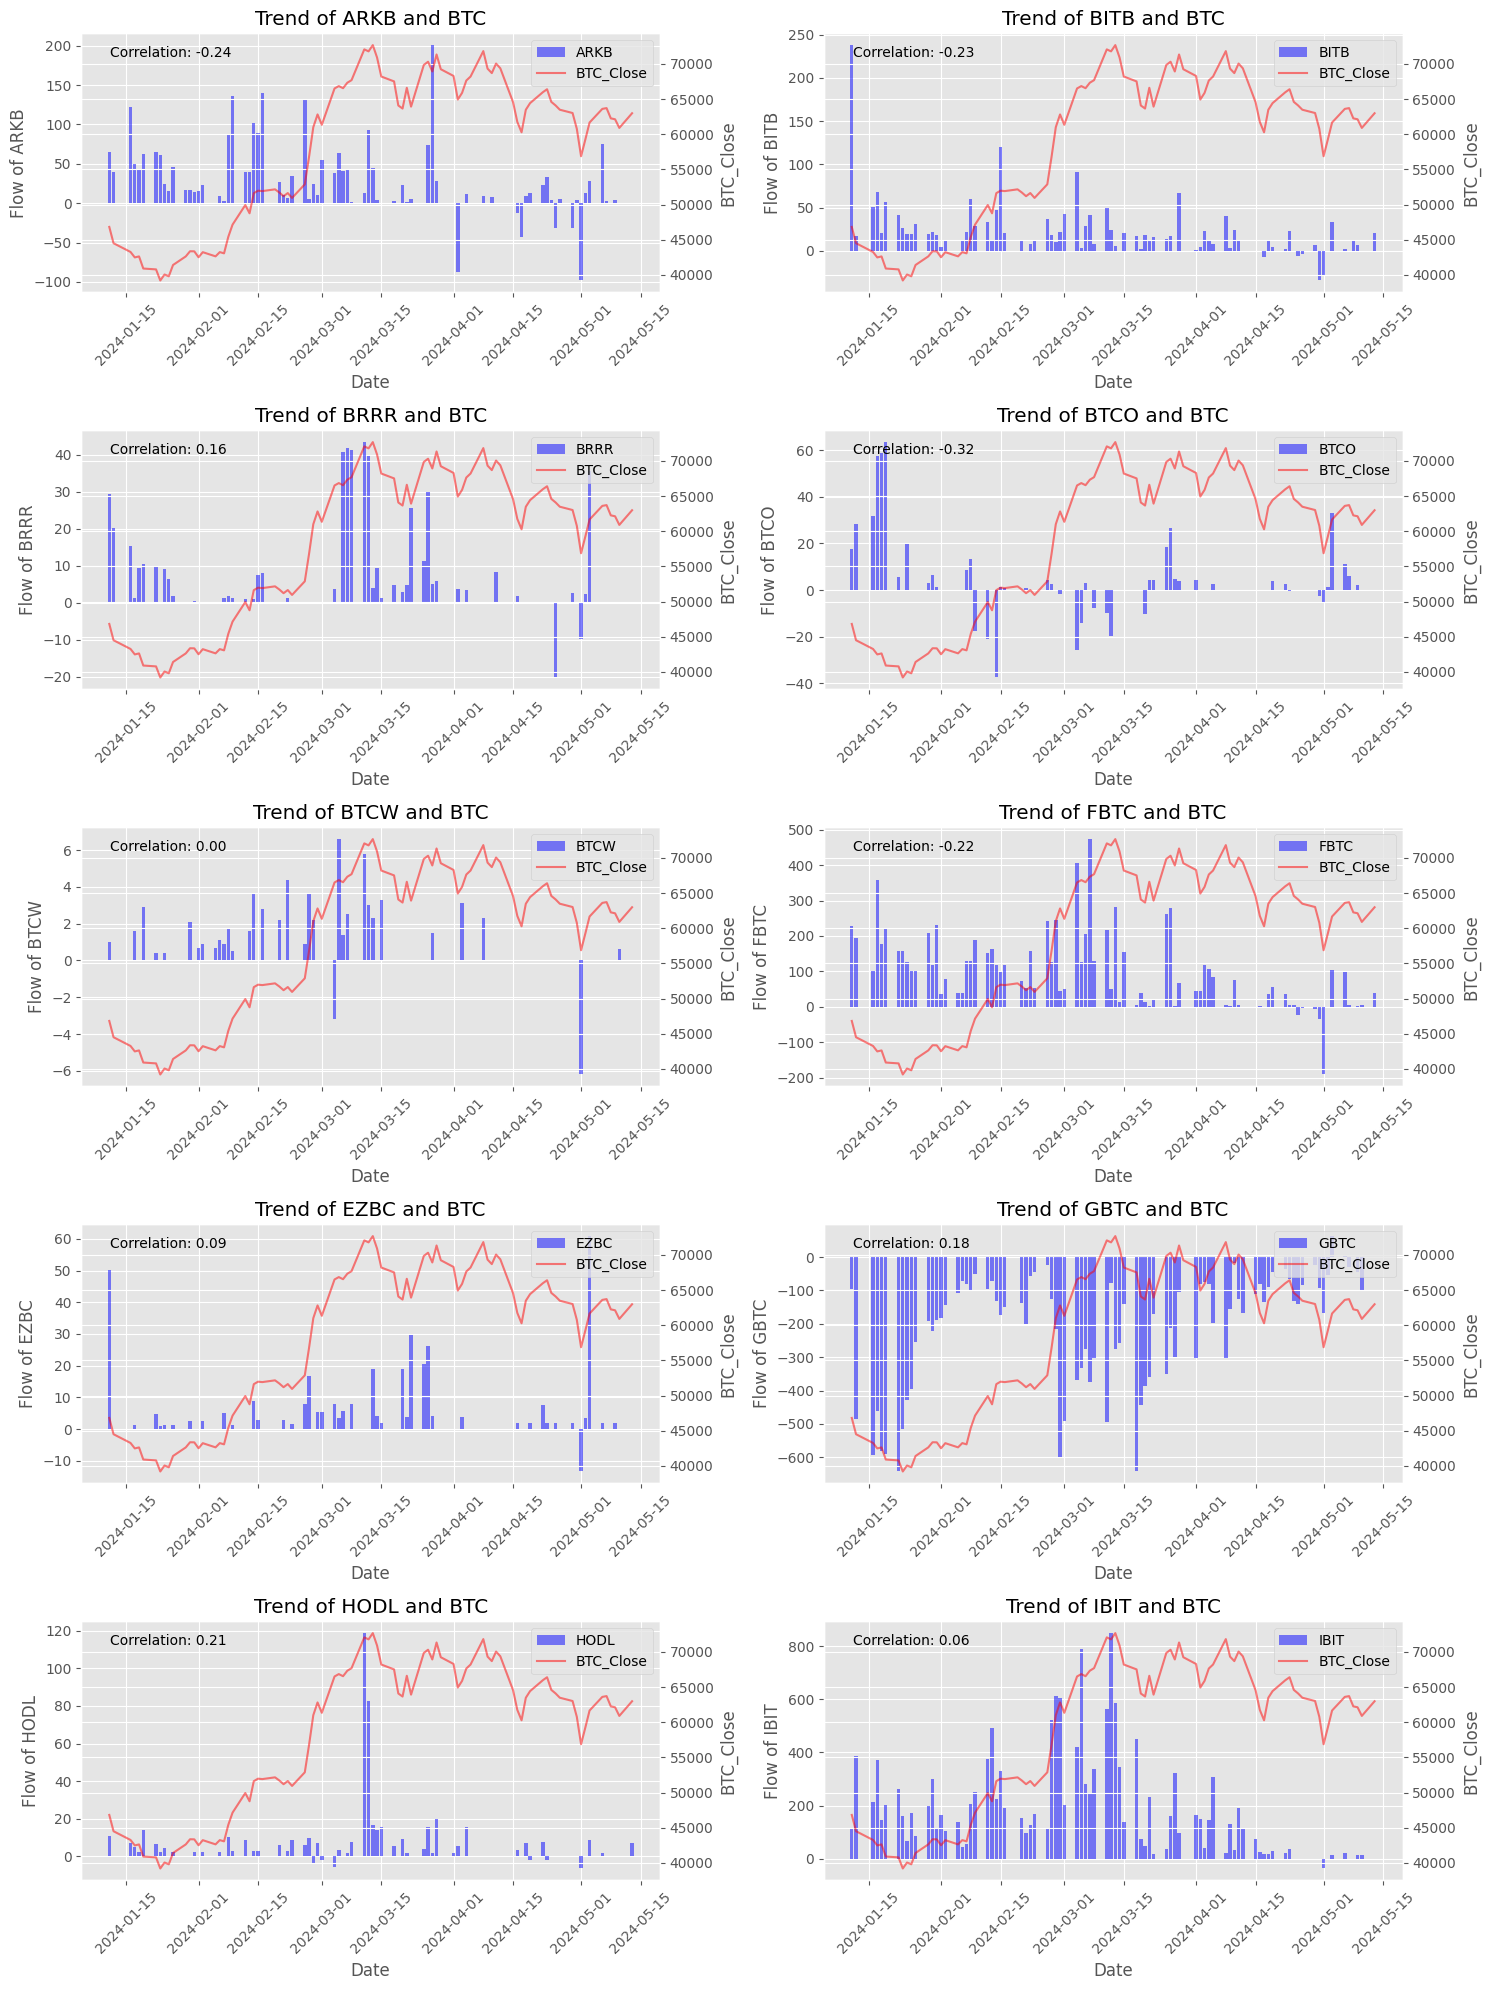

In [45]:
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']
correlations = df[columns_to_plot].corrwith(daily_08am_data['Close'])

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for i, col in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    ax.bar(df.index, df[col], alpha=0.5, label=col, color='blue')
    
    ax2 = ax.twinx()
    ax2.plot(df.index, daily_08am_data['Close'], alpha=0.5, label='BTC_Close', color='red')
    
    ax.set_title(f'Trend of {col} and BTC')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'Flow of {col}')
    ax2.set_ylabel('BTC_Close')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
    
    ax.grid(True)
    correlation = correlations[col]
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [46]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_08am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     3.239
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00164
Time:                        11:57:17   Log-Likelihood:                -891.77
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.041e+04   1813.052     33.322

### 9h

In [47]:
rule = '9h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

data11 = resample_daily(data, rule)
data11

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,45610.1,46272.0,89911.624
2024-01-11 09:00:00+00:00,46272.0,49027.5,45600.0,46517.3,431489.681
2024-01-11 18:00:00+00:00,46517.4,46973.8,46080.6,46325.7,75449.115
2024-01-12 00:00:00+00:00,46337.9,46536.2,45630.0,45862.3,83372.923
2024-01-12 09:00:00+00:00,45862.2,46280.0,43221.1,43836.4,296838.736
...,...,...,...,...,...
2024-05-12 18:00:00+00:00,61585.0,61620.5,60870.0,61496.4,21517.075
2024-05-13 00:00:00+00:00,61455.7,63107.6,60750.0,62749.5,121793.107
2024-05-13 09:00:00+00:00,62749.4,63440.0,62350.0,62784.0,113570.488


In [48]:
data11.index = pd.to_datetime(data11.index)
daily_09am_data = data11[data11.index.strftime('%H:%M:%S') == '09:00:00']
daily_09am_data.index = daily_09am_data.index.date
daily_09am_data

,Open,High,Low,Close,Volume
2024-01-11,46272.0,49027.5,45600.0,46517.3,431489.681
2024-01-12,45862.2,46280.0,43221.1,43836.4,296838.736
2024-01-13,43170.9,43273.4,42509.8,42899.2,103285.864
2024-01-14,42999.1,43096.1,42710.3,42979.7,43850.408
2024-01-15,42683.5,42969.0,42156.0,42704.4,90922.833
...,...,...,...,...,...
2024-05-09,61293.7,62637.3,60550.0,61916.0,138047.587
2024-05-10,63024.6,63446.5,60117.4,60368.4,209989.571
2024-05-11,60763.8,61491.4,60432.6,61070.2,54351.639
2024-05-12,61036.2,61849.4,60920.5,61585.0,53874.491


In [49]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_09am_data = daily_09am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

In [50]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_09am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     3.283
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00146
Time:                        11:57:18   Log-Likelihood:                -891.73
No. Observations:                  85   AIC:                             1805.
Df Residuals:                      74   BIC:                             1832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.055e+04   1812.190     33.410

### 10h

In [51]:
rule = '10h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

data12 = resample_daily(data, rule)
data12

,Open,High,Low,Close,Volume
Timestamp,,,,,
2024-01-11 00:00:00+00:00,46663.0,46758.0,45610.1,46212.8,95545.341
2024-01-11 10:00:00+00:00,46212.8,49027.5,45600.0,46698.4,452244.331
2024-01-11 20:00:00+00:00,46698.4,46973.8,46080.6,46325.7,49060.748
2024-01-12 00:00:00+00:00,46337.9,46536.2,45527.5,45938.0,101670.664
2024-01-12 10:00:00+00:00,45938.1,46280.0,43221.1,43497.5,320559.331
...,...,...,...,...,...
2024-05-12 20:00:00+00:00,61393.4,61527.5,60870.0,61496.4,15253.623
2024-05-13 00:00:00+00:00,61455.7,63289.3,60750.0,63028.3,138041.420
2024-05-13 10:00:00+00:00,63028.3,63440.0,62350.0,63140.5,109671.705


In [52]:
data12.index = pd.to_datetime(data12.index)
daily_010am_data = data12[data12.index.strftime('%H:%M:%S') == '10:00:00']
daily_010am_data.index = daily_010am_data.index.date
daily_010am_data

,Open,High,Low,Close,Volume
2024-01-11,46212.8,49027.5,45600.0,46698.4,452244.331
2024-01-12,45938.1,46280.0,43221.1,43497.5,320559.331
2024-01-13,42927.4,43273.4,42509.8,42791.1,104740.923
2024-01-14,43065.8,43077.4,42633.2,42665.8,51569.996
2024-01-15,42759.9,43376.0,42156.0,42989.6,133352.768
...,...,...,...,...,...
2024-05-09,61272.8,62637.3,60550.0,62420.6,139746.664
2024-05-10,63108.9,63446.5,60117.4,60682.4,223575.753
2024-05-11,60876.2,61491.4,60432.6,61112.9,55198.951
2024-05-12,60975.8,61849.4,60920.5,61393.5,57543.844


In [53]:
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_010am_data = daily_010am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')

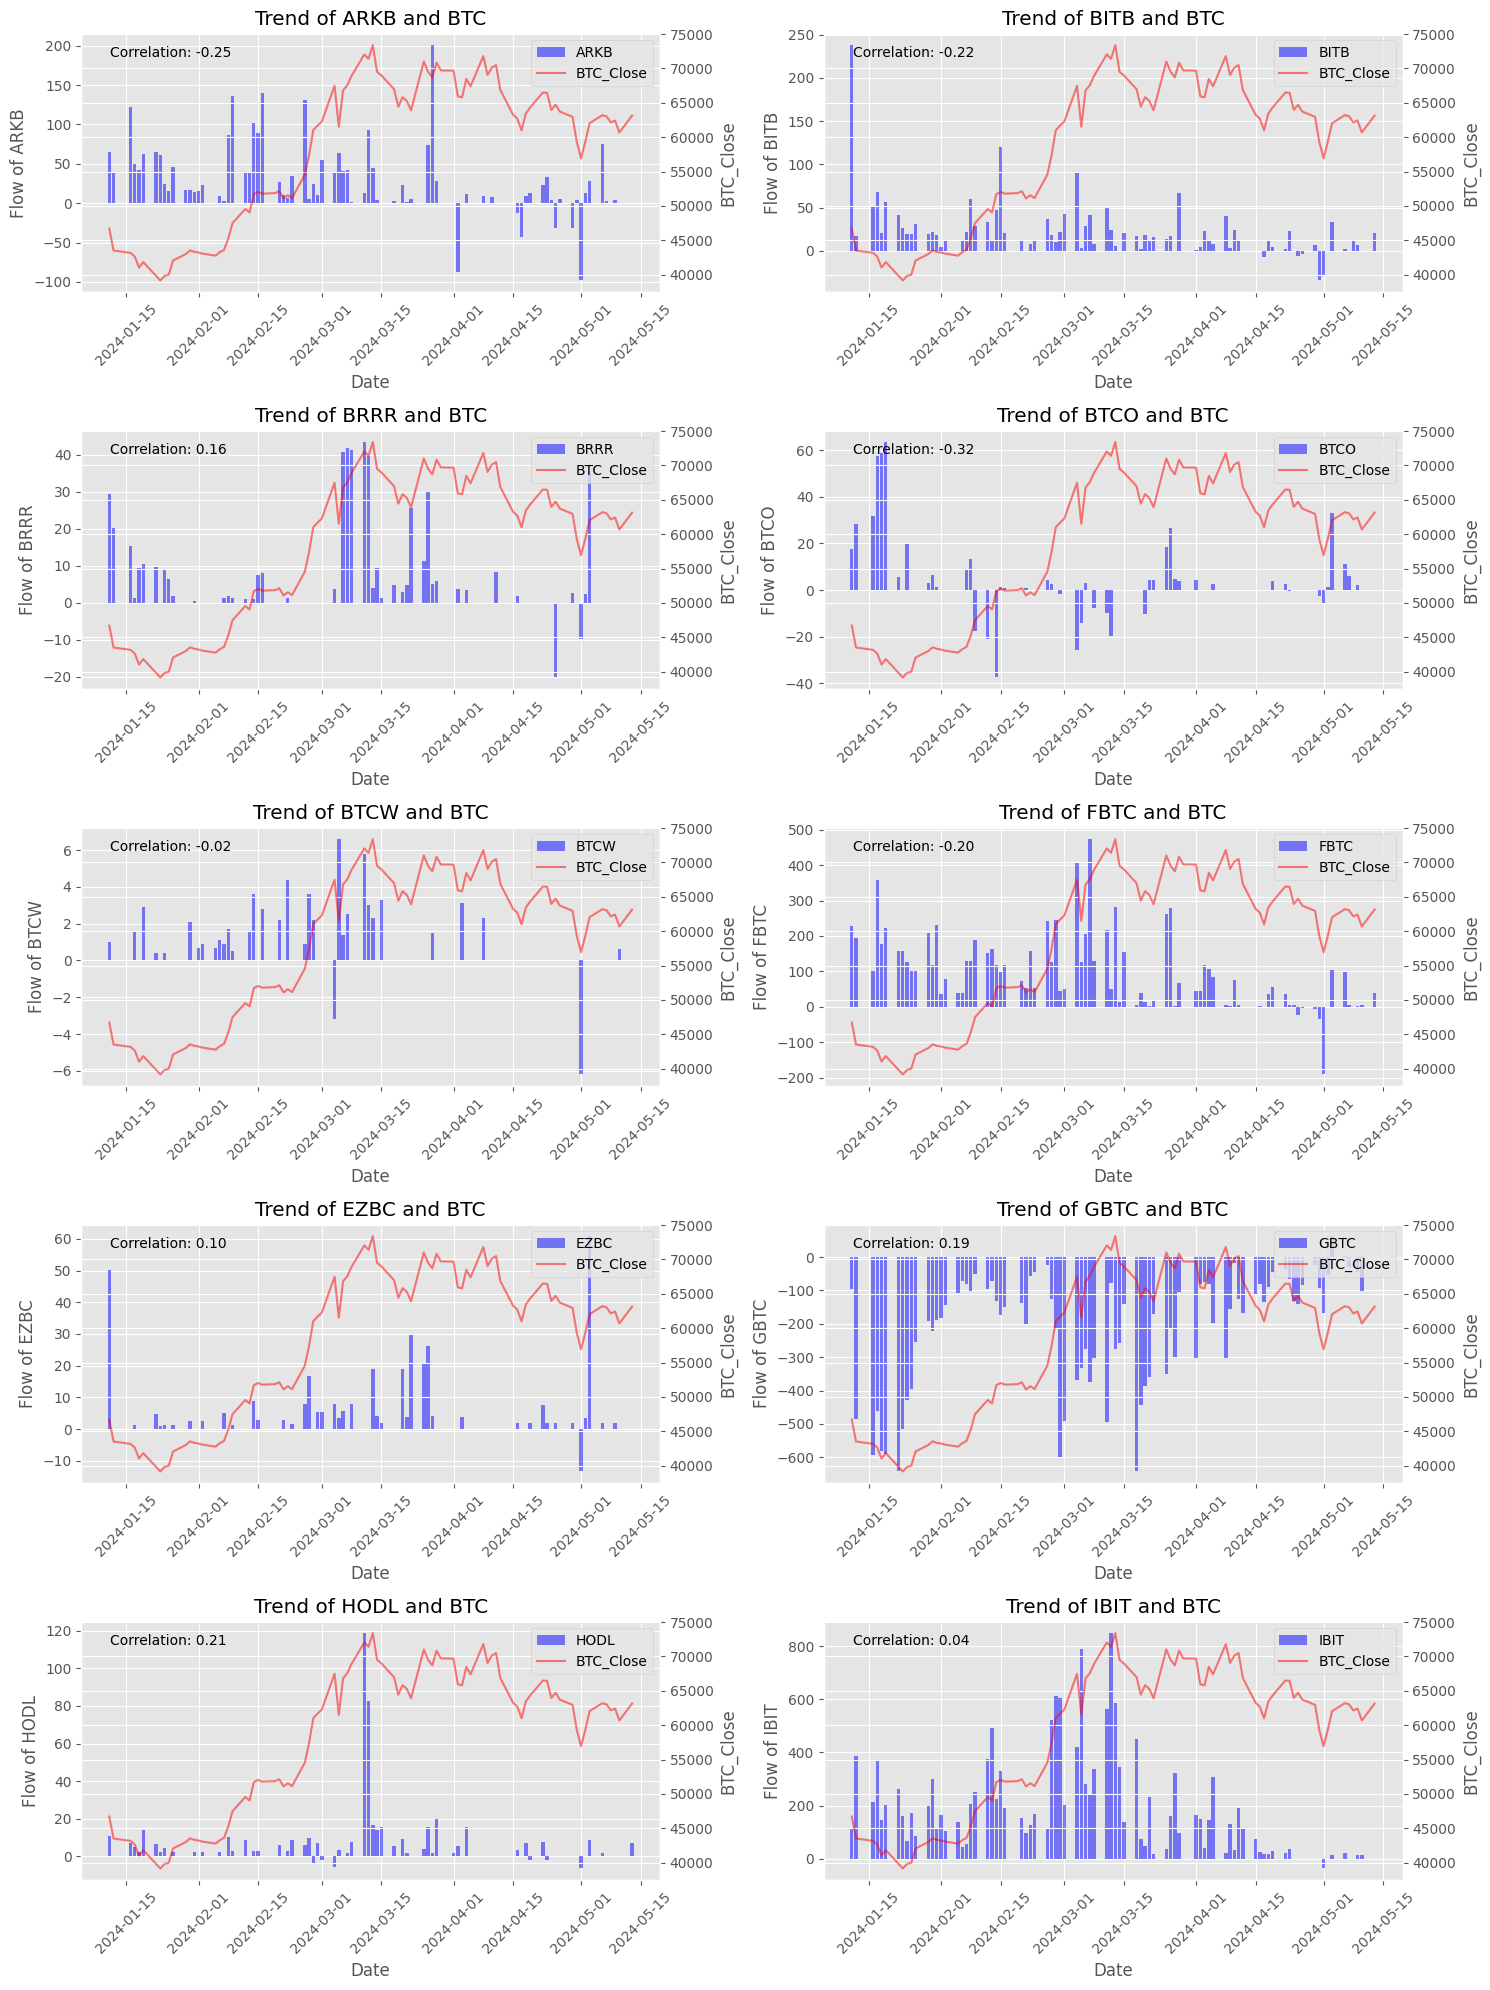

In [54]:
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']
correlations = df[columns_to_plot].corrwith(daily_010am_data['Close'])

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
for i, col in enumerate(columns_to_plot):
    ax = axes[i//2, i%2]
    ax.bar(df.index, df[col], alpha=0.5, label=col, color='blue')
    
    ax2 = ax.twinx()
    ax2.plot(df.index, daily_010am_data['Close'], alpha=0.5, label='BTC_Close', color='red')
    
    ax.set_title(f'Trend of {col} and BTC')
    ax.set_xlabel('Date')
    ax.set_ylabel(f'Flow of {col}')
    ax2.set_ylabel('BTC_Close')
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
        
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
    
    ax.grid(True)
    correlation = correlations[col]
    ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

In [55]:
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_010am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     3.240
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00164
Time:                        11:57:21   Log-Likelihood:                -891.73
No. Observations:                  85   AIC:                             1805.
Df Residuals:                      74   BIC:                             1832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.055e+04   1812.185     33.413

In [56]:
rule = '11h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# 重新采样数据
data13 = resample_daily(data, rule)
data13.index = pd.to_datetime(data13.index)
daily_011am_data = data13[data13.index.strftime('%H:%M:%S') == '11:00:00']
daily_011am_data.index = daily_011am_data.index.date
daily_011am_data
dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12','2024-05-14']
daily_011am_data = daily_011am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']
correlations = df[columns_to_plot].corrwith(daily_011am_data['Close'])
regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_011am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     3.302
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00138
Time:                        11:57:21   Log-Likelihood:                -891.78
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1832.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.058e+04   1813.350     33.407

In [57]:
rule = '12h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# 重新采样数据
data14 = resample_daily(data, rule)
data14.index = pd.to_datetime(data14.index)
daily_012am_data = data14[data14.index.strftime('%H:%M:%S') == '12:00:00']
daily_012am_data.index = daily_012am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_012am_data = daily_012am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# 确保所有列都是数值类型，并处理无效值
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_012am_data['Close'] = pd.to_numeric(daily_012am_data['Close'], errors='coerce')

# 计算相关性
correlations = df[columns_to_plot].corrwith(daily_012am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_012am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     3.318
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00133
Time:                        11:57:22   Log-Likelihood:                -891.98
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.064e+04   1817.518     33.364

In [58]:
rule = '13h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# 重新采样数据
data15 = resample_daily(data, rule)
data15.index = pd.to_datetime(data15.index)
daily_013am_data = data15[data15.index.strftime('%H:%M:%S') == '13:00:00']
daily_013am_data.index = daily_013am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_013am_data = daily_013am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# 确保所有列都是数值类型，并处理无效值
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_013am_data['Close'] = pd.to_numeric(daily_013am_data['Close'], errors='coerce')

# 计算相关性
correlations = df[columns_to_plot].corrwith(daily_013am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_013am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:22   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [59]:
rule = '14h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data16 = resample_daily(data, rule)
data16.index = pd.to_datetime(data16.index)
daily_014am_data = data16[data16.index.strftime('%H:%M:%S') == '14:00:00']
daily_014am_data.index = daily_014am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_014am_data = daily_014am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_014am_data['Close'] = pd.to_numeric(daily_014am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_014am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_014am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:22   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [60]:
rule = '15h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data17 = resample_daily(data, rule)
data17.index = pd.to_datetime(data17.index)
daily_015am_data = data17[data17.index.strftime('%H:%M:%S') == '15:00:00']
daily_015am_data.index = daily_015am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_015am_data = daily_015am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_015am_data['Close'] = pd.to_numeric(daily_015am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_015am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_015am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:22   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [61]:
rule = '16h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data18 = resample_daily(data, rule)
data18.index = pd.to_datetime(data18.index)
daily_016am_data = data18[data18.index.strftime('%H:%M:%S') == '16:00:00']
daily_016am_data.index = daily_016am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_016am_data = daily_016am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_016am_data['Close'] = pd.to_numeric(daily_016am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_016am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_016am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:23   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [62]:
rule = '17h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data19 = resample_daily(data, rule)
data19.index = pd.to_datetime(data19.index)
daily_017am_data = data19[data19.index.strftime('%H:%M:%S') == '17:00:00']
daily_017am_data.index = daily_017am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_017am_data = daily_017am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_017am_data['Close'] = pd.to_numeric(daily_017am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_017am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_017am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:23   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [63]:
rule = '18h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data20 = resample_daily(data, rule)
data20.index = pd.to_datetime(data20.index)
daily_018am_data = data20[data20.index.strftime('%H:%M:%S') == '18:00:00']
daily_018am_data.index = daily_018am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_018am_data = daily_018am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_018am_data['Close'] = pd.to_numeric(daily_018am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_018am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_018am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:23   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [64]:
rule = '19h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data21 = resample_daily(data, rule)
data21.index = pd.to_datetime(data21.index)
daily_019am_data = data21[data21.index.strftime('%H:%M:%S') == '19:00:00']
daily_019am_data.index = daily_019am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_019am_data = daily_019am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_019am_data['Close'] = pd.to_numeric(daily_019am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_019am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_019am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:23   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [65]:
rule = '20h'

def resample_daily(data, rule):
    start = data.index.min().normalize()
    end = data.index.max().normalize() + pd.Timedelta(days=1)
    new_index = pd.date_range(start=start, end=end, freq=rule)
    
    resampled_data = []
    for day in pd.date_range(start=start, end=end, freq='D'):
        daily_data = data[day:day+pd.Timedelta(days=1)]
        if not daily_data.empty:
            resampled_daily = daily_data.resample(rule=rule, closed='left', label='left').agg({
                'Open': 'first',
                'High': 'max',
                'Low': 'min',
                'Close': 'last',
                'Volume': 'sum'
            })
            resampled_data.append(resampled_daily)
    
    return pd.concat(resampled_data)

# Resample the data
data22 = resample_daily(data, rule)
data22.index = pd.to_datetime(data22.index)
daily_020am_data = data22[data22.index.strftime('%H:%M:%S') == '20:00:00']
daily_020am_data.index = daily_020am_data.index.date

dates_to_drop = ['2024-01-15', '2024-01-13', '2024-01-14', '2024-01-20',
                 '2024-01-21', '2024-01-27', '2024-01-28', '2024-02-03',
                 '2024-02-04', '2024-02-10', '2024-02-11', '2024-02-17',
                 '2024-02-18', '2024-02-24', '2024-02-25', '2024-03-02',
                 '2024-03-03', '2024-03-09', '2024-03-10', '2024-03-16',
                 '2024-03-17', '2024-03-23', '2024-03-24', '2024-03-30',
                 '2024-03-31', '2024-04-06', '2024-04-07', '2024-04-13',
                 '2024-04-14', '2024-04-20', '2024-04-21', '2024-04-27',
                 '2024-04-28', '2024-05-04', '2024-05-05', '2024-05-11',
                 '2024-05-12', '2024-05-14']

daily_020am_data = daily_020am_data.drop(pd.to_datetime(dates_to_drop), errors='ignore')
columns_to_plot = ['ARKB', 'BITB', 'BRRR', 'BTCO', 'BTCW', 'FBTC', 'EZBC', 'GBTC', 'HODL', 'IBIT']

# Ensure all columns are numeric and handle NaN values
df[columns_to_plot] = df[columns_to_plot].apply(pd.to_numeric, errors='coerce')
daily_020am_data['Close'] = pd.to_numeric(daily_020am_data['Close'], errors='coerce')

# Calculate correlations
correlations = df[columns_to_plot].corrwith(daily_020am_data['Close'])

regression_df = pd.DataFrame({
    'ETF_Flow_ARKB': df['ARKB'], 
    'ETF_Flow_BITB': df['BITB'], 
    'ETF_Flow_BRRR': df['BRRR'], 
    'ETF_Flow_BTCO': df['BTCO'], 
    'ETF_Flow_BTCW': df['BTCW'], 
    'ETF_Flow_FBTC': df['FBTC'], 
    'ETF_Flow_EZBC': df['EZBC'], 
    'ETF_Flow_GBTC': df['GBTC'], 
    'ETF_Flow_HODL': df['HODL'], 
    'ETF_Flow_IBIT': df['IBIT'],  
    'Next_Close': daily_020am_data['Close']    
})

regression_df.dropna(inplace=True)
X = regression_df.drop(columns='Next_Close')
y = regression_df['Next_Close']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Next_Close   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     3.325
Date:                Fri, 07 Jun 2024   Prob (F-statistic):            0.00130
Time:                        11:57:23   Log-Likelihood:                -891.91
No. Observations:                  85   AIC:                             1806.
Df Residuals:                      74   BIC:                             1833.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.063e+04   1815.997     33.386

In [66]:
results_df_list = []

for i in range(1, 21):
    daily_data = globals()[f'daily_0{i}am_data']
    regression_df = pd.DataFrame({
        'ETF_Flow_FBTC': df['FBTC'], 
        'ETF_Flow_GBTC': df['GBTC'],  
        'ETF_Flow_IBIT': df['IBIT'],  
        'Next_Close': daily_data['Close'] 
    })
    regression_df2 = pd.DataFrame({
        'ETF_Flow_FBTC': df['FBTC'], 
        'ETF_Flow_GBTC': df['GBTC'],  
        'ETF_Flow_IBIT': df['IBIT'], 
    })
    regression_df.dropna(inplace=True)
    X = regression_df.drop(columns='Next_Close')
    y = regression_df['Next_Close']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    pvalues = model.pvalues
    params = model.params
    significant_etfs = pvalues[pvalues < 0.1].index
    significant_etfs = significant_etfs[significant_etfs != 'const']
    significant_params = params[significant_etfs]
    correlations =  regression_df2.corrwith(daily_data['Close'])
    results_df_i = pd.DataFrame({
        'ETF': significant_etfs,
        'Coefficient': significant_params,
        'P-Value': pvalues[significant_etfs],
        'correlation': correlations[significant_etfs]
    })
    
    results_df_i.set_index('ETF', inplace=True)
    results_df_i.index = pd.MultiIndex.from_tuples([(f'{i}h', idx) for idx in results_df_i.index])
    results_df_list.append(results_df_i)

results_df_combined = pd.concat(results_df_list)
results_df_combined

Coefficient   P-Value  correlation
1h  ETF_Flow_FBTC   -32.103935  0.007035    -0.274984
    ETF_Flow_IBIT    13.709226  0.046207     0.041659
2h  ETF_Flow_FBTC   -32.063978  0.006668    -0.278003
    ETF_Flow_IBIT    13.337500  0.050445     0.037606
3h  ETF_Flow_FBTC   -31.988314  0.006753    -0.275964
    ETF_Flow_IBIT    13.475778  0.047993     0.041202
4h  ETF_Flow_FBTC   -30.227476  0.011367    -0.256635
    ETF_Flow_IBIT    13.577150  0.049451     0.048160
5h  ETF_Flow_FBTC   -29.177581  0.015044    -0.244906
    ETF_Flow_IBIT    13.919380  0.045464     0.055161
6h  ETF_Flow_FBTC   -29.165692  0.014210    -0.244970
    ETF_Flow_IBIT    14.079644  0.041259     0.059464
7h  ETF_Flow_FBTC   -28.215675  0.017248    -0.236714
    ETF_Flow_GBTC    11.721298  0.097937     0.177153
    ETF_Flow_IBIT    14.392536  0.036537     0.065402
8h  ETF_Flow_FBTC   -25.157077  0.032877    -0.215181
    ETF_Flow_GBTC    12.089188  0.087592     0.180751
    ETF_Flow_IBIT    13.631645  0.047066     0.062313
9h  ETF_Flow_FBTC   -23.725962  0.045010    -0.208040
    ETF_Flow_GBTC    12.294067  0.084106     0.185921
    ETF_Flow_IBIT    12.725021  0.064807     0.050480
10h ETF_Flow_FBTC   -22.477013  0.057399    -0.204284
    ETF_Flow_GBTC    12.543206  0.078307     0.193626
    ETF_Flow_IBIT    11.737170  0.088225     0.036337
11h ETF_Flow_FBTC   -24.083902  0.042362    -0.215164
    ETF_Flow_GBTC    12.120118  0.089152     0.188472
    ETF_Flow_IBIT    12.068053  0.080198     0.038374
12h ETF_Flow_FBTC   -24.090235  0.042415    -0.213206
    ETF_Flow_GBTC    12.773081  0.073648     0.194161
    ETF_Flow_IBIT    12.712634  0.065747     0.045431
13h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
14h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
15h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
16h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
17h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
18h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
19h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198
20h ETF_Flow_FBTC   -24.162582  0.041690    -0.213518
    ETF_Flow_GBTC    12.730943  0.074409     0.193481
    ETF_Flow_IBIT    12.755435  0.064699     0.046198

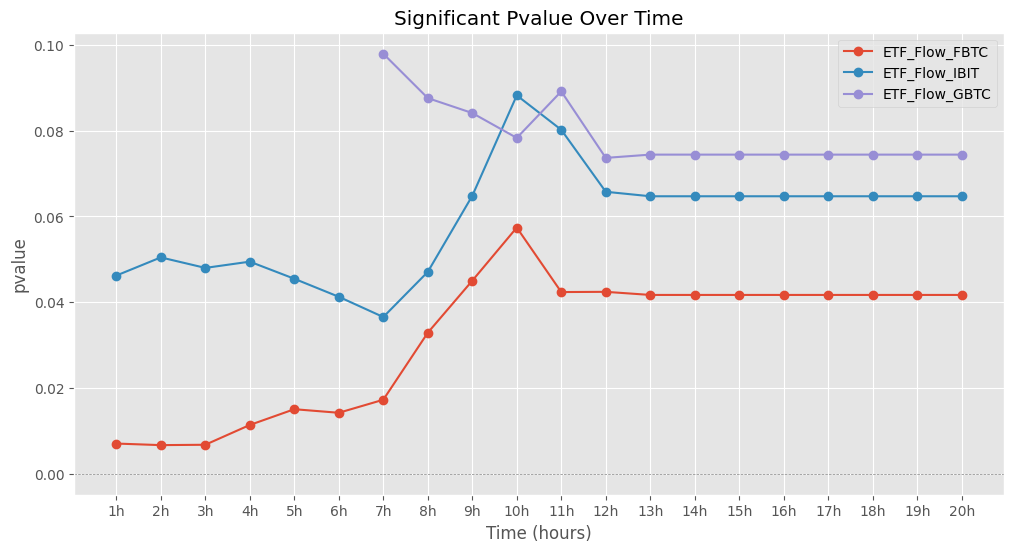

In [67]:
plt.figure(figsize=(12, 6))

for etf in results_df_combined.index.get_level_values(1).unique():
    etf_data = results_df_combined.loc[(slice(None), etf), :]
    plt.plot(etf_data.index.get_level_values(0), etf_data['P-Value'], marker='o', label=etf)

plt.axhline(0, color='gray', linewidth=0.5, linestyle='--')
plt.xlabel('Time (hours)')
plt.ylabel('pvalue')
plt.title('Significant Pvalue Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
# columns_to_plot = ['IBIT', 'FBTC', 'GBTC']
# hours = list(range(1, 11))

# fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(20, 40))

# for hour in hours:
#     daily_data = globals()[f'daily_0{hour}am_data']
#     correlations = df[columns_to_plot].corrwith(daily_data['Close'])
    
#     for i, col in enumerate(columns_to_plot):
#         ax = axes[hour-1, i]
        
#         ax.bar(df.index, df[col], alpha=0.5, label=col, color='blue')
        
#         ax2 = ax.twinx()
#         ax2.plot(df.index, daily_data['Close'], alpha=0.5, label='BTC_Close', color='red')
        
#         ax.set_title(f'{hour}h Trend of {col} and BTC')
#         ax.set_xlabel('Date')
#         ax.set_ylabel(f'Flow of {col}')
#         ax2.set_ylabel('BTC_Close')
        
#         for tick in ax.get_xticklabels():
#             tick.set_rotation(45)
            
#         lines_1, labels_1 = ax.get_legend_handles_labels()
#         lines_2, labels_2 = ax2.get_legend_handles_labels()
#         ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')
        
#         ax.grid(True)
#         correlation = correlations[col]
#         ax.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=ax.transAxes, verticalalignment='top')

# plt.tight_layout()
# plt.show()

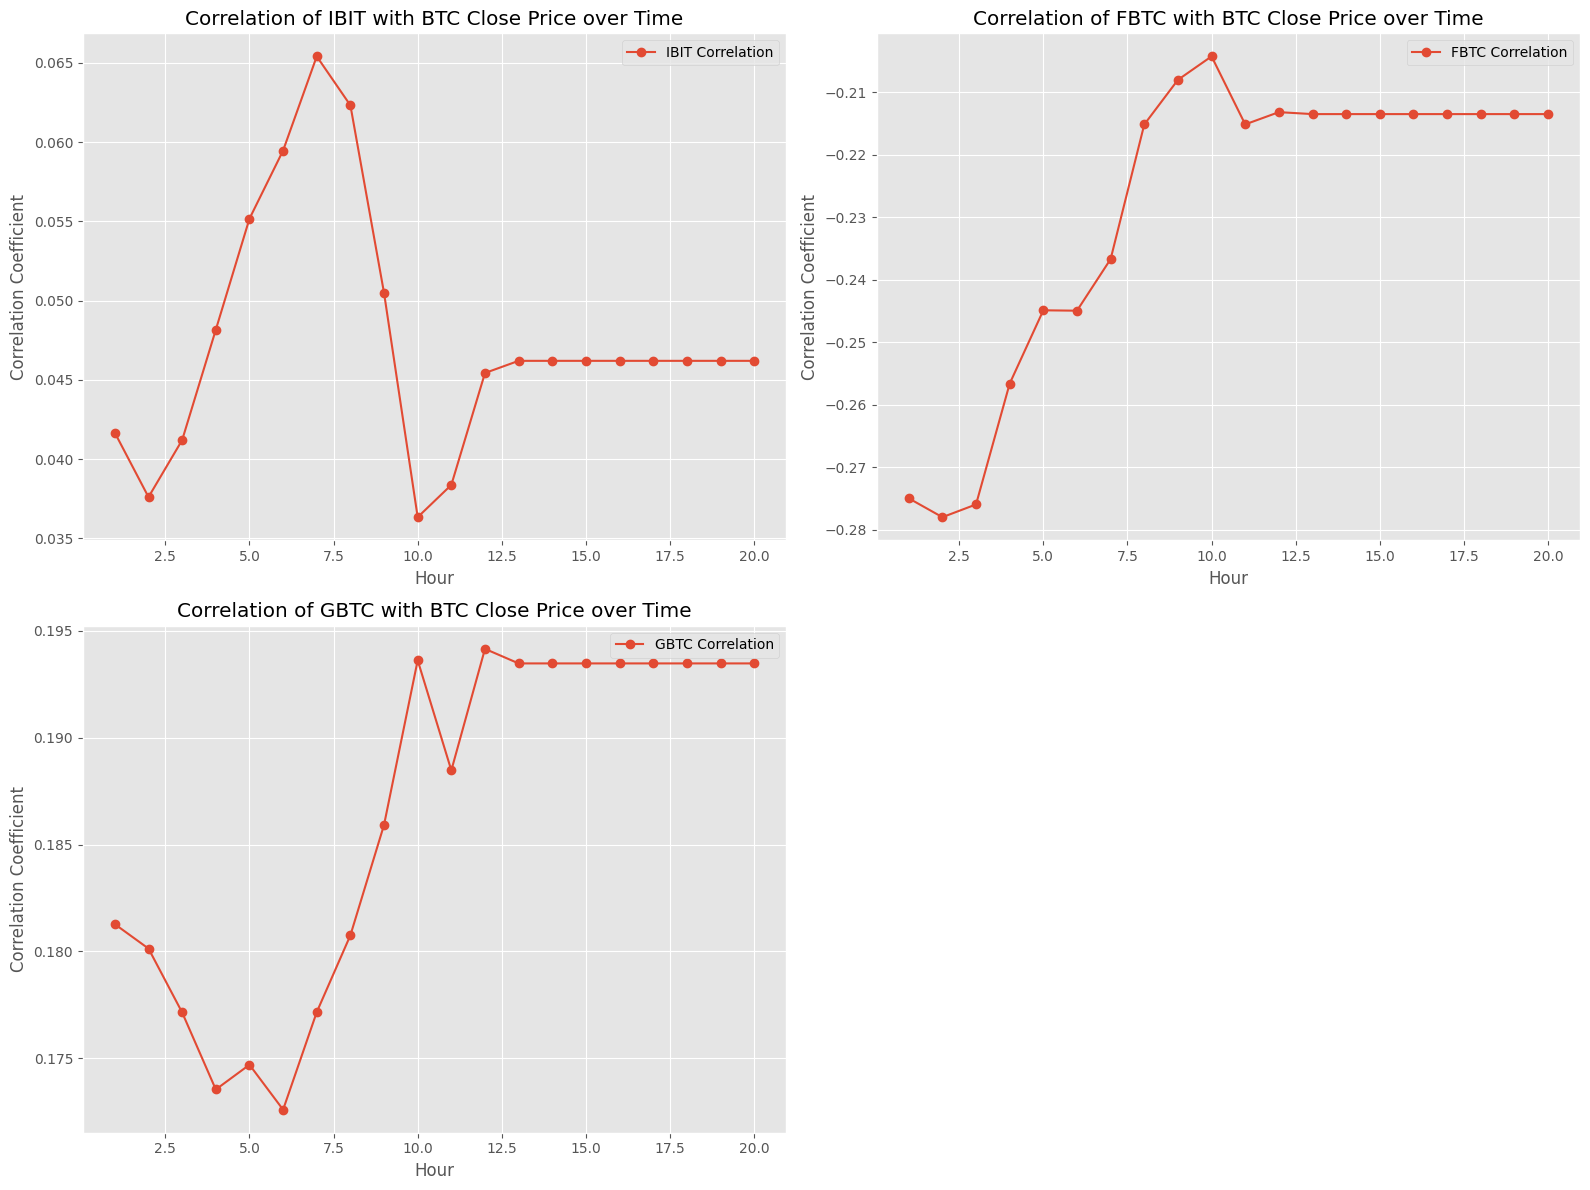

In [69]:
import matplotlib.pyplot as plt

# 定义需要计算相关性的列和时间范围
columns_to_plot = ['IBIT', 'FBTC', 'GBTC']
hours = list(range(1, 21))

# 初始化存储相关性数据的字典
correlation_data = {col: [] for col in columns_to_plot}

# 计算每小时的相关性
for hour in hours:
    daily_data = globals()[f'daily_0{hour}am_data']
    correlations = df[columns_to_plot].corrwith(daily_data['Close'])
    for col in columns_to_plot:
        correlation_data[col].append(correlations[col])

# 绘制相关性趋势
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# 为每个列创建一个子图
for i, col in enumerate(columns_to_plot):
    ax = axes[i // 2, i % 2]
    ax.plot(hours, correlation_data[col], marker='o', label=f'{col} Correlation')
    ax.set_title(f'Correlation of {col} with BTC Close Price over Time')
    ax.set_xlabel('Hour')
    ax.set_ylabel('Correlation Coefficient')
    ax.legend()
    ax.grid(True)

# 隐藏未使用的子图
if len(columns_to_plot) < 4:
    axes[-1, -1].axis('off')

plt.tight_layout()
plt.show()


In [70]:
trade = pd.DataFrame({
        'ETF_Flow_IBIT': df['IBIT'], 
        'ETF_Flow_FBTC': df['FBTC'], 
        'ETF_Flow_GBTC': df['GBTC'],
    })

In [71]:
trade['Close'] = daily_017am_data['Close']
trade['Open'] = daily_017am_data['Open']

In [72]:
trade

,ETF_Flow_IBIT,ETF_Flow_FBTC,ETF_Flow_GBTC,Close,Open
Date,,,,,
2024-01-11,111.7,227.0,-95.1,46325.7,46038.0
2024-01-12,386.0,195.3,-484.1,42822.3,43661.2
2024-01-16,212.7,102.0,-594.4,43152.9,43249.8
2024-01-17,371.4,358.1,-460.6,42756.2,42358.5
2024-01-18,145.5,177.9,-582.3,41270.3,41953.9
...,...,...,...,...,...
2024-05-07,0.0,4.1,-28.6,62324.8,63613.0
2024-05-08,0.0,0.0,0.0,61153.9,62419.0
2024-05-09,14.2,2.7,-43.4,63070.2,61832.4


### Scatter

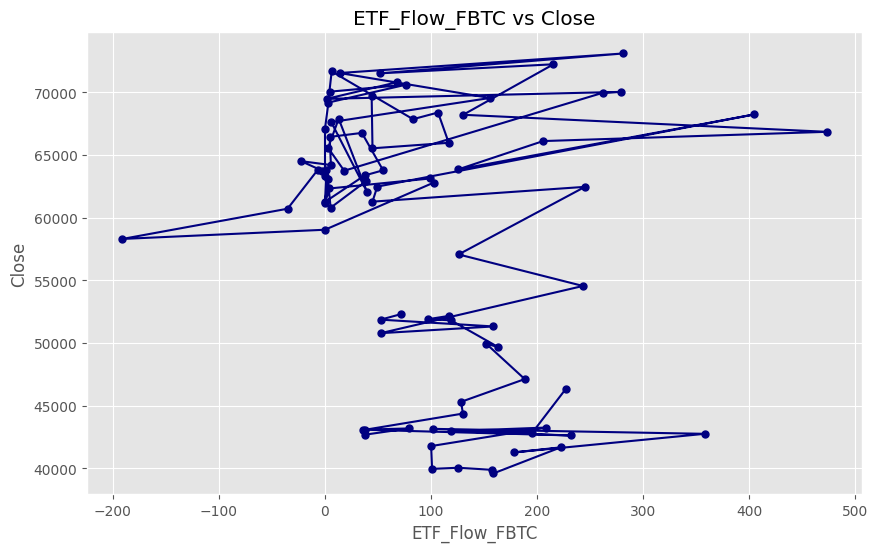

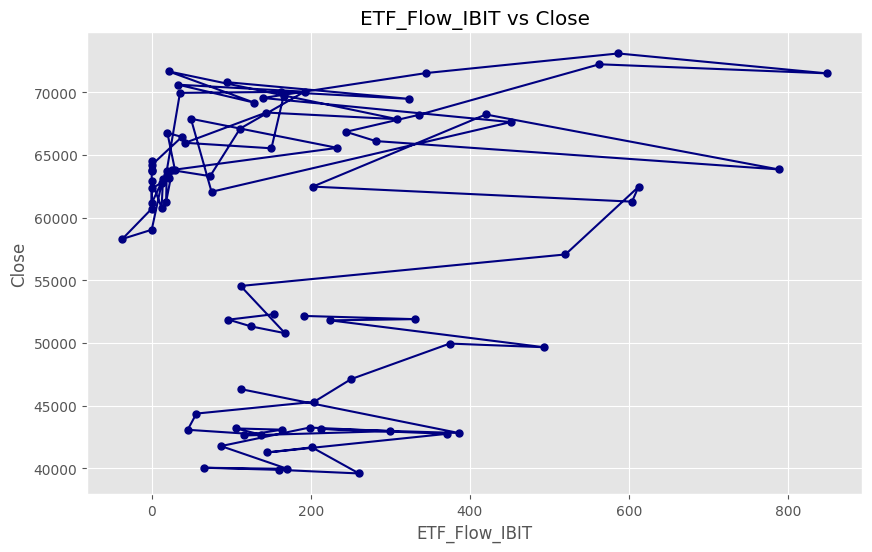

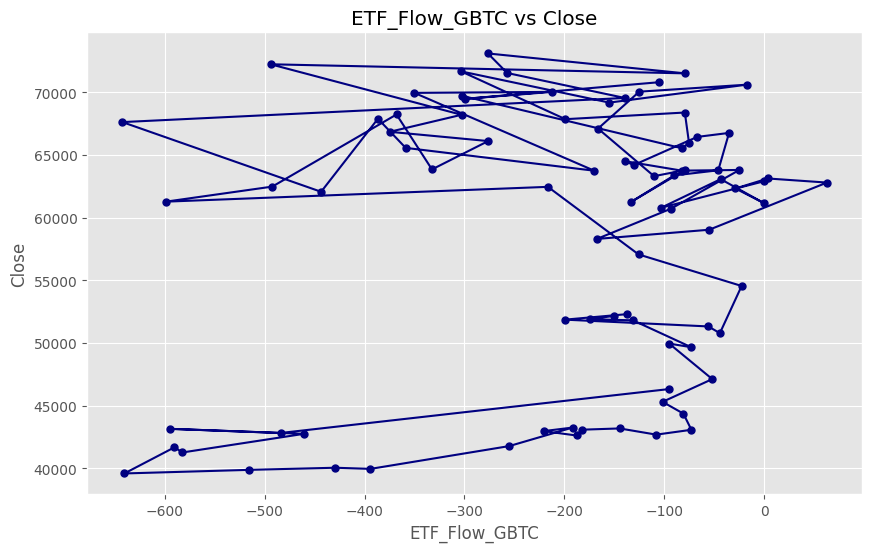

In [73]:
columns = ['ETF_Flow_FBTC', 'ETF_Flow_IBIT', 'ETF_Flow_GBTC']

for column in columns:
    plt.figure(figsize=(10, 6))
    plt.plot(trade[column], trade['Close'], color='navy', marker='o', linestyle='-', markersize=5)  
    plt.title(f'{column} vs Close')
    plt.xlabel(f'{column}')
    plt.ylabel('Close')
    plt.grid(True)
    
    # for i in range(0, len(trade), 10):
    #     plt.text(trade[column].iloc[i], trade['Close'].iloc[i], trade.index[i], fontsize=9, rotation=45)
    
    # plt.show()

Correlation for threshold -600: -1.0, p-value: 1.0
Correlation for threshold -500: -0.461, p-value: 0.298
Correlation for threshold -400: 0.014, p-value: 0.963
Correlation for threshold -300: 0.532, p-value: 0.009
Correlation for threshold -200: 0.437, p-value: 0.014
Correlation for threshold -100: 0.193, p-value: 0.154
Max correlation: 0.532 at threshold -300 with p-value 0.009


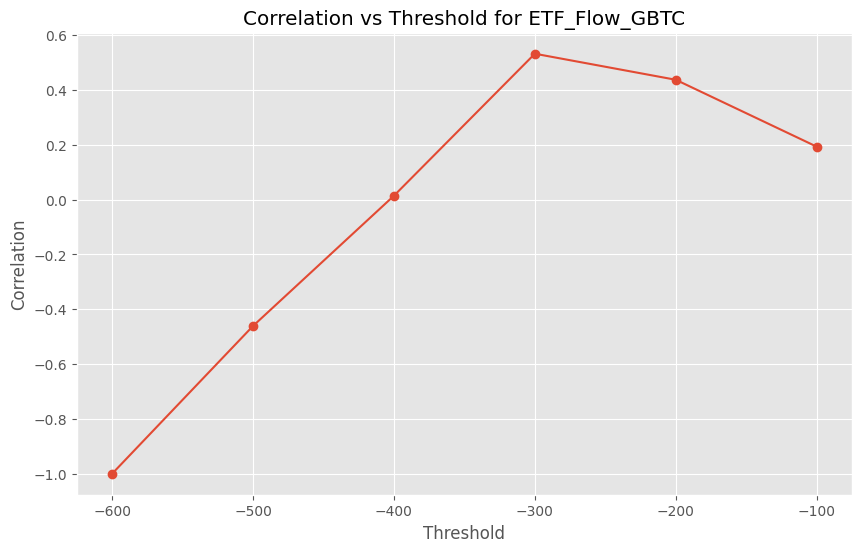

In [74]:
thresholds = range(-600, 0, 100)
correlations = []

for threshold in thresholds:
    condition = (trade['ETF_Flow_GBTC'] < threshold)
    filtered_trade = trade.loc[condition, ['ETF_Flow_GBTC', 'Close']]
    correlation, p_value = pearsonr(filtered_trade['ETF_Flow_GBTC'], filtered_trade['Close'])
    correlations.append((correlation, p_value))
    print(f"Correlation for threshold {threshold}: {round(correlation, 3)}, p-value: {round(p_value, 3)}")

max_correlation, max_p_value = max(correlations, key=lambda x: x[0] if not np.isnan(x[0]) else -1)
max_threshold = thresholds[correlations.index((max_correlation, max_p_value))]
print(f"Max correlation: {round(max_correlation, 3)} at threshold {max_threshold} with p-value {round(max_p_value, 3)}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, [round(c[0], 3) for c in correlations], marker='o', linestyle='-')
plt.title('Correlation vs Threshold for ETF_Flow_GBTC')
plt.xlabel('Threshold')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Correlation for threshold 0: 0.1, p-value: 0.392
Correlation for threshold 100: 0.343, p-value: 0.014
Correlation for threshold 200: 0.43, p-value: 0.02
Correlation for threshold 300: 0.271, p-value: 0.277
Correlation for threshold 400: 0.245, p-value: 0.496
Correlation for threshold 500: 0.283, p-value: 0.539
Correlation for threshold 600: 0.851, p-value: 0.149


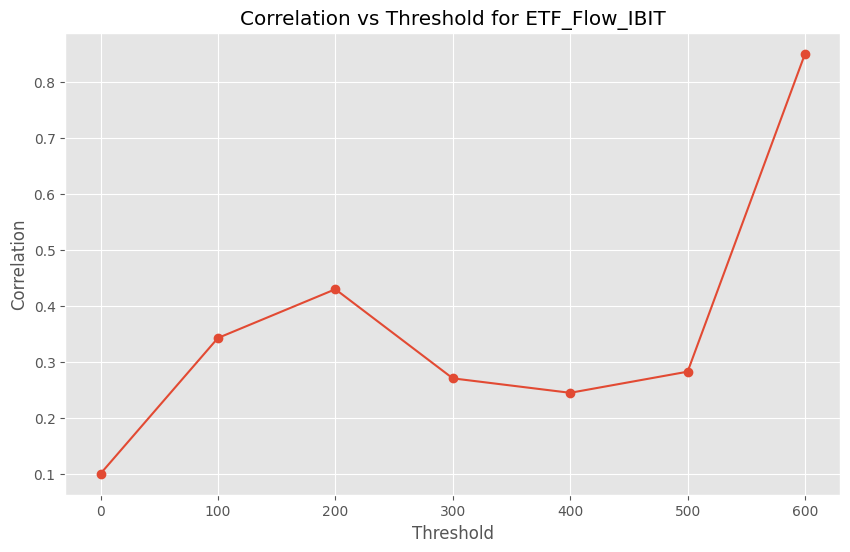

In [75]:
thresholds = range(0, 700, 100)
correlations = []

for threshold in thresholds:
    condition = (trade['ETF_Flow_IBIT'] > threshold)
    filtered_trade = trade.loc[condition, ['ETF_Flow_IBIT', 'Close']]
    if not filtered_trade.empty:
        correlation, p_value = pearsonr(filtered_trade['ETF_Flow_IBIT'], filtered_trade['Close'])
        correlations.append(correlation)
        print(f"Correlation for threshold {threshold}: {correlation.round(3)}, p-value: {p_value.round(3)}")
    else:
        correlations.append(None) 
        print(f"No data for threshold {threshold}")

plt.figure(figsize=(10, 6))
plt.plot(thresholds, correlations, marker='o', linestyle='-')
plt.title('Correlation vs Threshold for ETF_Flow_IBIT')
plt.xlabel('Threshold')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

Correlation for threshold 0: -0.187, p-value: 0.109
Correlation for threshold 100: 0.309, p-value: 0.059
Correlation for threshold 200: 0.258, p-value: 0.373
Correlation for threshold 300: 0.776, p-value: 0.435


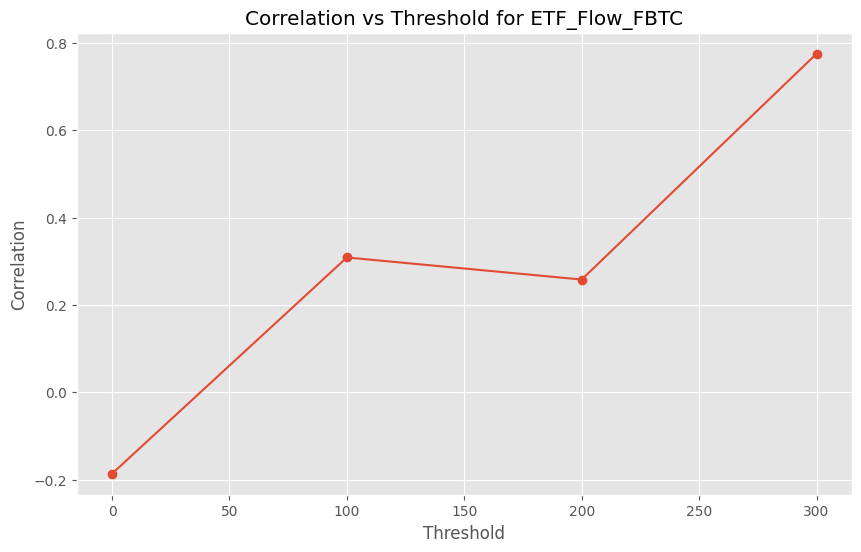

In [76]:
thresholds = range(0, 400, 100)

correlations = [] 

for threshold in thresholds:
    condition = trade['ETF_Flow_FBTC'] > threshold
    filtered_trade = trade.loc[condition, ['ETF_Flow_FBTC', 'Close']]
    if not filtered_trade.empty:
        correlation, p_value = pearsonr(filtered_trade['ETF_Flow_FBTC'], filtered_trade['Close'])
        correlations.append(correlation)
        print(f"Correlation for threshold {threshold}: {correlation.round(3)}, p-value: {p_value.round(3)}")
    else:
        correlations.append(None) 
        print(f"No data for threshold {threshold}")
    
plt.figure(figsize=(10, 6))
plt.plot(thresholds, correlations, marker='o', linestyle='-')
plt.title('Correlation vs Threshold for ETF_Flow_FBTC')
plt.xlabel('Threshold')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

In [77]:
df_arr = np.array(trade)
time_arr = np.array(trade.index)
date_arr = [pd.to_datetime(i).date() for i in time_arr]

### gbtc

Buy at 2024-01-16T00:00:00.000000000: ['condition1']
Sell at 2024-01-19T00:00:00.000000000: ['stopLoss1']
Trade completed

Buy at 2024-01-22T00:00:00.000000000: ['condition1']
Sell at 2024-01-26T00:00:00.000000000: ['stopLoss2']
Trade completed

Buy at 2024-03-01T00:00:00.000000000: ['condition1']
Sell at 2024-03-05T00:00:00.000000000: ['stopLoss2']
Trade completed

Buy at 2024-03-12T00:00:00.000000000: ['condition1']
Sell at 2024-03-14T00:00:00.000000000: ['stopLoss2']
Trade completed

Buy at 2024-03-19T00:00:00.000000000: ['condition1']
Sell at 2024-03-21T00:00:00.000000000: ['stopLoss2']
Trade completed



<Axes: xlabel='Date'>

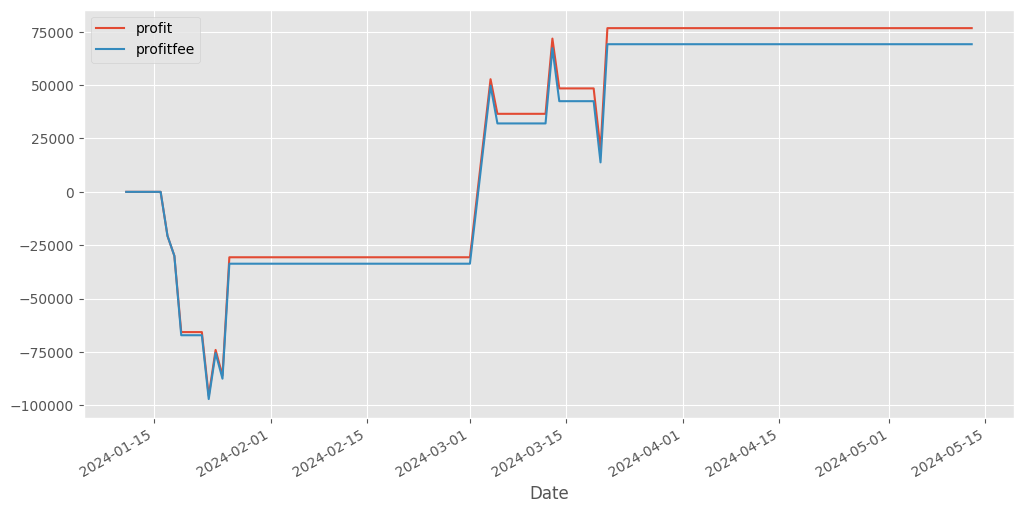

In [78]:
fund = 1000000
money = 1000000
feeRate = 0.00075
K = 0.03

BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):
    if i == len(df_arr) - 1:
        break

    # 進場邏輯
    entryBuy_conditions = {"condition1": df_arr[i, 2] < -400}
    entryBuy = any(entryBuy_conditions.values())

    # 停利停損
    if BS == 'L':
        stopLoss_conditions = {
            "stopLoss1": df_arr[i, 3] <= df_arr[t, 3] * (1 - K),
            "stopLoss2": -100 > df_arr[i, 2] > -400
        }
        stopLoss = any(stopLoss_conditions.values())

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryBuy:
            tempSize = money / df_arr[i+1,4]
            BS = 'L'
            t = i + 1
            buy.append(t)
            triggered_condition = [k for k, v in entryBuy_conditions.items() if v]
            print("Buy at {}: {}".format(time_arr[t], triggered_condition))

    elif BS == 'L':
        profit = tempSize * (df_arr[i+1,4] - df_arr[i,4])
        profit_list.append(profit)

        if i == len(df_arr) - 2 or stopLoss:
            pl_round  = tempSize * (df_arr[i+1,4] - df_arr[i,4])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list.append(profit_fee)
            sell.append(i + 1)
            BS = None
            triggered_condition = [k for k, v in stopLoss_conditions.items() if v]
            print("Sell at {}: {}".format(time_arr[i + 1], triggered_condition))
            print("Trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

equity1 = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
equity1.plot(grid=True, figsize=(12, 6))

### ibit

Buy at 2024-01-12T00:00:00.000000000: ['condition3']
Sell at 2024-01-16T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-01-19T00:00:00.000000000: ['condition3']
Sell at 2024-01-22T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-01-24T00:00:00.000000000: ['condition3']
Sell at 2024-01-31T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-02-01T00:00:00.000000000: ['condition3']
Sell at 2024-02-09T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-02-19T00:00:00.000000000: ['condition3']
Sell at 2024-03-04T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-03-12T00:00:00.000000000: ['condition4']
Sell at 2024-03-15T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-03-18T00:00:00.000000000: ['condition3']
Sell at 2024-03-20T00:00:00.000000000: ['stopLoss1']
Trade completed

Buy at 2024-03-21T00:00:00.000000000: ['condition3']
Sell at 2024-03-22T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-03-2

<Axes: xlabel='Date'>

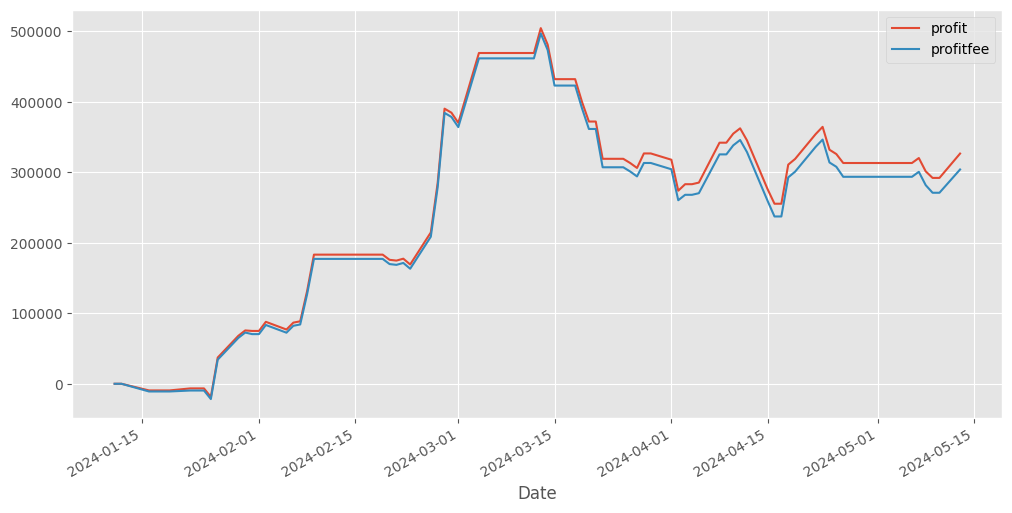

In [79]:
fund = 1000000
money = 1000000
feeRate = 0.00075
K = 0.03

BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):
    if i == len(df_arr) - 1:
        break

    # 進場邏輯
    entryBuy_conditions = {
        "condition3": 200 > df_arr[i, 0] > 0,
        "condition4": 600 > df_arr[i, 0] > 500
    }
    entryBuy = any(entryBuy_conditions.values())

    # 停利停損
    if BS == 'L':
        stopLoss_conditions = {
            "stopLoss1": df_arr[i, 3] <= df_arr[t, 3] * (1 - K),
            "stopLoss3": 200 < df_arr[i, 0] < 400,
            "stopLoss4": df_arr[i,1] < 0
        }
        stopLoss = any(stopLoss_conditions.values())

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryBuy:
            tempSize = money / df_arr[i+1,4]
            BS = 'L'
            t = i + 1
            buy.append(t)
            triggered_condition = [k for k, v in entryBuy_conditions.items() if v]
            print("Buy at {}: {}".format(time_arr[t], triggered_condition))

    elif BS == 'L':
        profit = tempSize * (df_arr[i+1,4] - df_arr[i,4])
        profit_list.append(profit)

        if i == len(df_arr) - 2 or stopLoss:
            pl_round  = tempSize * (df_arr[i+1,4] - df_arr[i,4])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list.append(profit_fee)
            sell.append(i + 1)
            BS = None
            triggered_condition = [k for k, v in stopLoss_conditions.items() if v]
            print("Sell at {}: {}".format(time_arr[i + 1], triggered_condition))
            print("Trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

equity2 = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
equity2.plot(grid=True, figsize=(12, 6))

### fbtc

Buy at 2024-01-12T00:00:00.000000000: ['condition2']
Sell at 2024-01-16T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-01-22T00:00:00.000000000: ['condition2']
Sell at 2024-01-23T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-01-30T00:00:00.000000000: ['condition2']
Sell at 2024-01-31T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-02-01T00:00:00.000000000: ['condition2']
Sell at 2024-02-08T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-02-16T00:00:00.000000000: ['condition2']
Sell at 2024-02-19T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-02-21T00:00:00.000000000: ['condition2']
Sell at 2024-02-23T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-02-26T00:00:00.000000000: ['condition2']
Sell at 2024-02-28T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-02-29T00:00:00.000000000: ['condition2']
Sell at 2024-03-06T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-03-0

<Axes: xlabel='Date'>

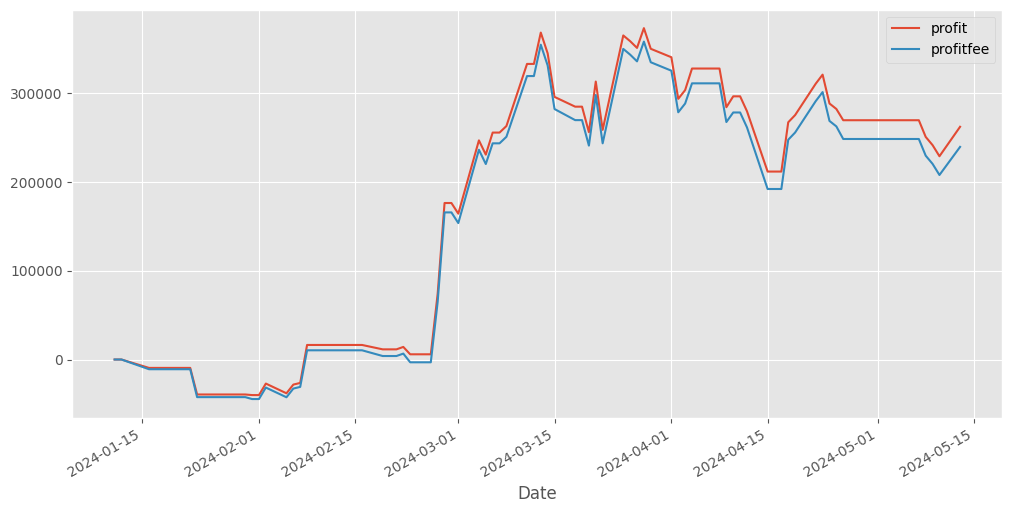

In [80]:
fund = 1000000
money = 1000000
feeRate = 0.00075
K = 0.03

BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):
    if i == len(df_arr) - 1:
        break

    # 進場邏輯
    entryBuy_conditions = {
        "condition2": 100> df_arr[i, 1] > 0 or 300 > df_arr[i, 1] > 200,
    }
    entryBuy = any(entryBuy_conditions.values())

    # 停利停損
    if BS == 'L':
        stopLoss_conditions = {
            "stopLoss1": df_arr[i, 3] <= df_arr[t, 3] * (1 - K),
            "stopLoss4": 100 < df_arr[i,1] < 200 or df_arr[i, 1] < 0
        }
        stopLoss = any(stopLoss_conditions.values())

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryBuy:
            tempSize = money / df_arr[i+1,4]
            BS = 'L'
            t = i + 1
            buy.append(t)
            triggered_condition = [k for k, v in entryBuy_conditions.items() if v]
            print("Buy at {}: {}".format(time_arr[t], triggered_condition))

    elif BS == 'L':
        profit = tempSize * (df_arr[i+1,4] - df_arr[i,4])
        profit_list.append(profit)

        if i == len(df_arr) - 2 or stopLoss:
            pl_round  = tempSize * (df_arr[i+1,4] - df_arr[i,4])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list.append(profit_fee)
            sell.append(i + 1)
            BS = None
            triggered_condition = [k for k, v in stopLoss_conditions.items() if v]
            print("Sell at {}: {}".format(time_arr[i + 1], triggered_condition))
            print("Trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

equity3 = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
equity3.plot(grid=True, figsize=(12, 6))

Buy at 2024-01-12T00:00:00.000000000: ['condition2', 'condition3']
Sell at 2024-01-16T00:00:00.000000000: ['stopLoss3', 'stopLoss4']
Trade completed

Buy at 2024-01-17T00:00:00.000000000: ['condition1']
Sell at 2024-01-18T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-01-19T00:00:00.000000000: ['condition1', 'condition3']
Sell at 2024-01-22T00:00:00.000000000: ['stopLoss3']
Trade completed

Buy at 2024-01-23T00:00:00.000000000: ['condition1']
Sell at 2024-01-24T00:00:00.000000000: ['stopLoss4']
Trade completed

Buy at 2024-01-25T00:00:00.000000000: ['condition1', 'condition3']
Sell at 2024-01-26T00:00:00.000000000: ['stopLoss2', 'stopLoss4']
Trade completed

Buy at 2024-01-29T00:00:00.000000000: ['condition3']
Sell at 2024-01-30T00:00:00.000000000: ['stopLoss2']
Trade completed

Buy at 2024-02-01T00:00:00.000000000: ['condition2', 'condition3']
Sell at 2024-02-02T00:00:00.000000000: ['stopLoss2']
Trade completed

Buy at 2024-02-05T00:00:00.000000000: ['condition2', 'con

<Axes: xlabel='Date'>

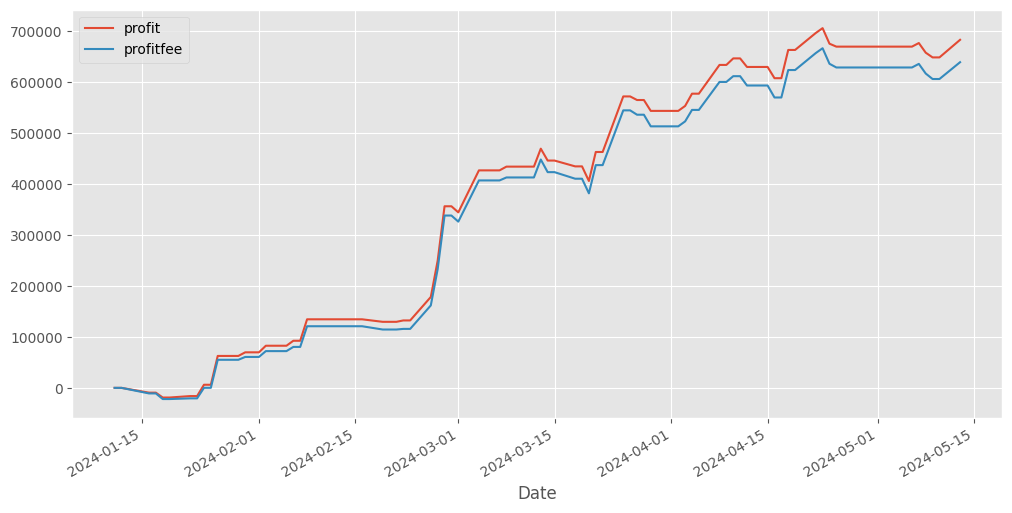

In [81]:
fund = 1000000
money = 1000000
feeRate = 0.00075
K = 0.03

BS = None
buy = []
sell = []
profit_list = [0]
profit_fee_list = [0]
profit_fee_list_realized = []

for i in range(len(df_arr)):
    if i == len(df_arr) - 1:
        break

    # 進場邏輯
    entryBuy_conditions = {
        "condition1": df_arr[i, 2] < -400,
        "condition2": 100> df_arr[i, 1] > 0 or 300 > df_arr[i, 1] > 200,
        "condition3": 200 > df_arr[i, 0] > 0,
        "condition4": 600 > df_arr[i, 0] > 500
    }
    entryBuy = any(entryBuy_conditions.values())

    # 停利停損
    if BS == 'L':
        stopLoss_conditions = {
            "stopLoss1": df_arr[i, 3] <= df_arr[t, 3] * (1 - K),
            "stopLoss2": -100 > df_arr[i, 2] > -400,
            "stopLoss3":  200 < df_arr[i, 0] < 400,
            "stopLoss4": 100 < df_arr[i,1] < 200 or df_arr[i,1] < 0
        }
        stopLoss = any(stopLoss_conditions.values())

    if BS == None:
        profit_list.append(0)
        profit_fee_list.append(0)

        if entryBuy:
            tempSize = money / df_arr[i+1,4]
            BS = 'L'
            t = i + 1
            buy.append(t)
            triggered_condition = [k for k, v in entryBuy_conditions.items() if v]
            print("Buy at {}: {}".format(time_arr[t], triggered_condition))

    elif BS == 'L':
        profit = tempSize * (df_arr[i+1,4] - df_arr[i,4])
        profit_list.append(profit)

        if i == len(df_arr) - 2 or stopLoss:
            pl_round  = tempSize * (df_arr[i+1,4] - df_arr[i,4])
            profit_fee = profit - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list.append(profit_fee)
            sell.append(i + 1)
            BS = None
            triggered_condition = [k for k, v in stopLoss_conditions.items() if v]
            print("Sell at {}: {}".format(time_arr[i + 1], triggered_condition))
            print("Trade completed")
            print()

            # Realized PnL
            profit_fee_realized = pl_round - money*feeRate - (money+pl_round)*feeRate
            profit_fee_list_realized.append(profit_fee_realized)

        else:
            profit_fee = profit
            profit_fee_list.append(profit_fee)

equity = pd.DataFrame({'profit':np.cumsum(profit_list), 'profitfee':np.cumsum(profit_fee_list)}, index=df.index)
equity.plot(grid=True, figsize=(12, 6))

In [82]:
equity['equity'] = equity['profitfee'] + fund
equity['drawdown_percent'] = (equity['equity'] / equity['equity'].cummax()) - 1
equity['drawdown'] = equity['equity'] - equity['equity'].cummax()
equity['open_ret'] = trade['Open'] / trade['Open'].shift(1) - 1
equity['open_ret'] = equity['open_ret'].fillna(0)
equity['buy_and_hold'] = fund * (trade['Close'] / trade['Close'].iloc[0])
equity.dropna()

,profit,profitfee,equity,drawdown_percent,drawdown,open_ret,buy_and_hold
Date,,,,,,,
2024-01-11,0.000000,0.000000,1.000000e+06,0.000000,0.000000,0.000000,1.000000e+06
2024-01-12,0.000000,0.000000,1.000000e+06,0.000000,0.000000,-0.051627,9.243746e+05
2024-01-16,-9422.553663,-10915.486748,9.890845e+05,-0.010915,-10915.486748,-0.009423,9.315110e+05
2024-01-17,-9422.553663,-10915.486748,9.890845e+05,-0.010915,-10915.486748,-0.020608,9.229477e+05
2024-01-18,-18974.355545,-21960.124778,9.780399e+05,-0.021960,-21960.124778,-0.009552,8.908727e+05
...,...,...,...,...,...,...,...
2024-05-07,676614.956293,635713.289999,1.635713e+06,-0.018436,-30722.697653,0.007061,1.345361e+06
2024-05-08,657712.681371,616811.015077,1.616811e+06,-0.029779,-49624.972575,-0.018770,1.320086e+06
2024-05-09,648426.186841,606031.485417,1.606031e+06,-0.036248,-60404.502234,-0.009398,1.361452e+06


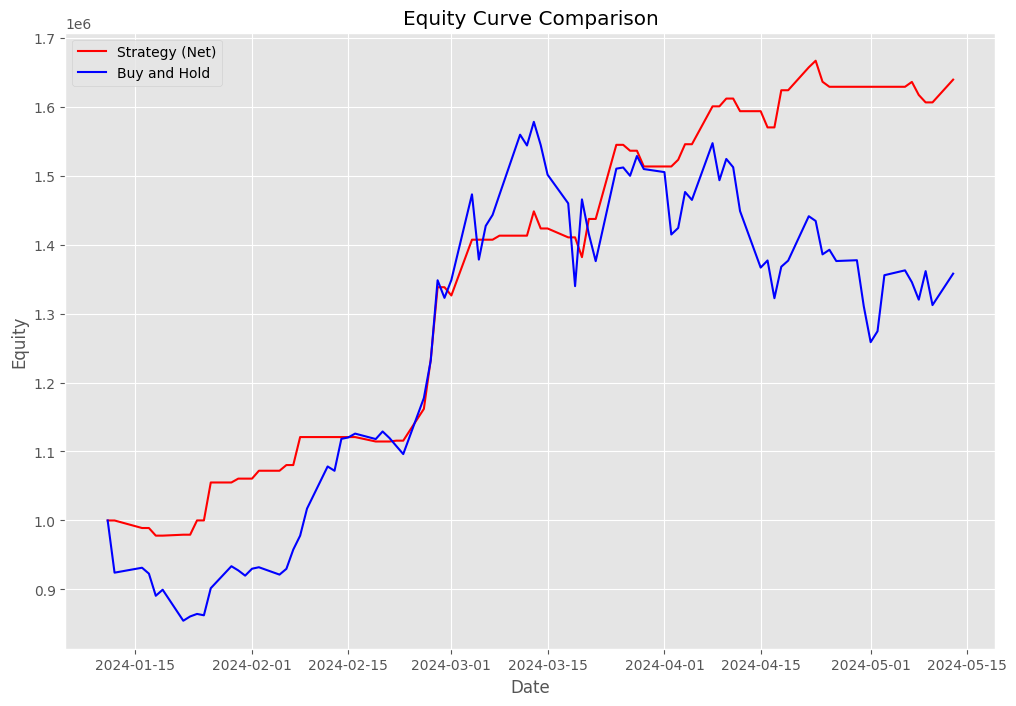

In [83]:
equity['open_ret'] = trade['Open'] / trade['Open'].shift(1) - 1
equity['open_ret'] = equity['open_ret'].fillna(0)
equity['buy_and_hold'] = fund * (trade['Close'] / trade['Close'].iloc[0])
equity.dropna()

plt.figure(figsize=(12, 8))
plt.plot(equity['equity'], label = 'Strategy (Net)', color = 'r')
plt.plot(equity['buy_and_hold'], label = 'Buy and Hold', color = 'b' )
plt.title('Equity Curve Comparison')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)
plt.show()

In [84]:
profit = equity['profitfee'].iloc[-1]
ret = equity['equity'].iloc[-1] / equity['equity'].iloc[0] - 1
mdd = abs(equity['drawdown_percent'].min())
calmarRatio = ret / mdd
tradeTimes = len(buy)+len(sell)
winRate = len([i for i in profit_fee_list_realized if i > 0]) / len(profit_fee_list_realized)
profitFactor = sum([i for i in profit_fee_list_realized if i > 0]) / abs(sum([i for i in profit_fee_list_realized if i < 0]))
winLossRatio = np.mean([i for i in profit_fee_list_realized if i > 0]) / abs(np.mean([i for i in profit_fee_list_realized if i < 0]))
ret_bh = equity['buy_and_hold'].iloc[-1] / equity['buy_and_hold'].iloc[0] - 1

print(f'profit: ${np.round(profit,2)}')
print(f'return: {np.round(ret,4)*100}%')
print(f'b&h return: {np.round(ret_bh, 4) * 100}%')
print(f'mdd: {np.round(mdd,4)*100}%')
print(f'calmarRatio: {np.round(calmarRatio,2)}')
print(f'tradeTimes: {tradeTimes}')
print(f'winRate: {np.round(winRate,4)*100}%')
print(f'profitFactor: {np.round(profitFactor,2)}')
print(f'winLossRatio: {np.round(winLossRatio,2)}')
# print(f'Sharpe Ratio: {np.round(sharpe_ratio, 2)}')

profit: $639017.12
return: 63.9%
b&h return: 35.78%
mdd: 4.58%
calmarRatio: 13.94
tradeTimes: 58
winRate: 62.07%
profitFactor: 4.29
winLossRatio: 2.62


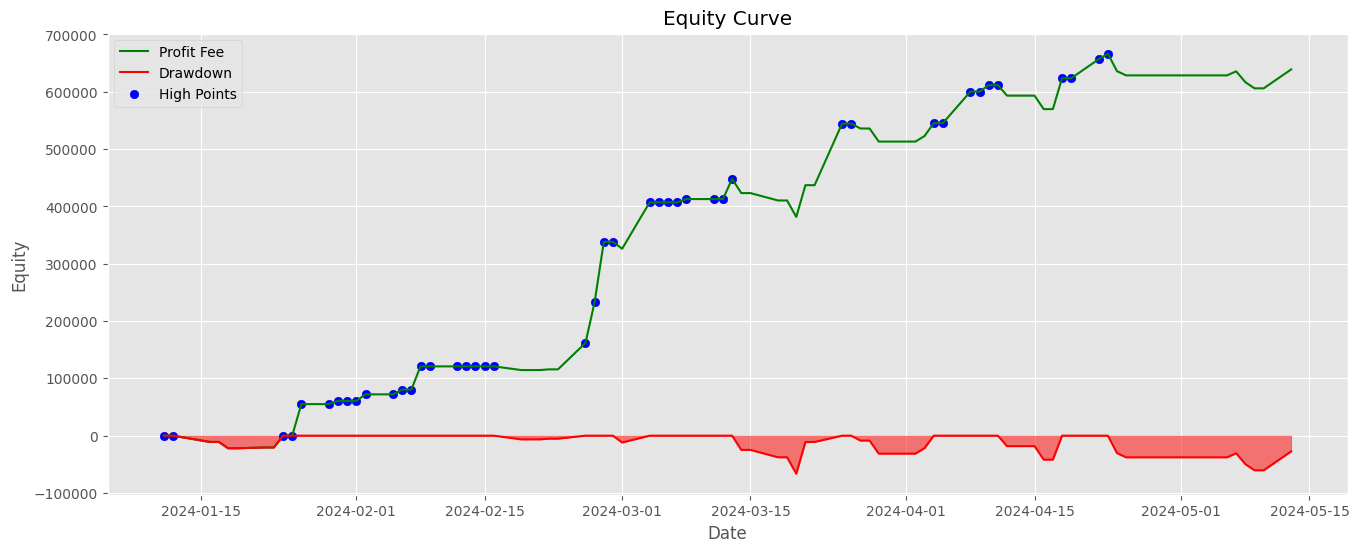

In [85]:
plt.figure(figsize=(16, 6))

plt.plot(equity.index, equity['profitfee'], color='green', label='Profit Fee')
plt.plot(equity.index, equity['drawdown'], color='red', label='Drawdown')
plt.fill_between(equity.index, equity['drawdown'], color='red', alpha=0.5)

high_index = equity[equity['profitfee'].cummax() == equity['profitfee']].index
high_values = equity[equity['profitfee'].cummax() == equity['profitfee']]['profitfee']

plt.scatter(high_index, high_values, color='blue', marker='o', label='High Points')

plt.legend()
plt.title('Equity Curve')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.grid(True)

plt.show()

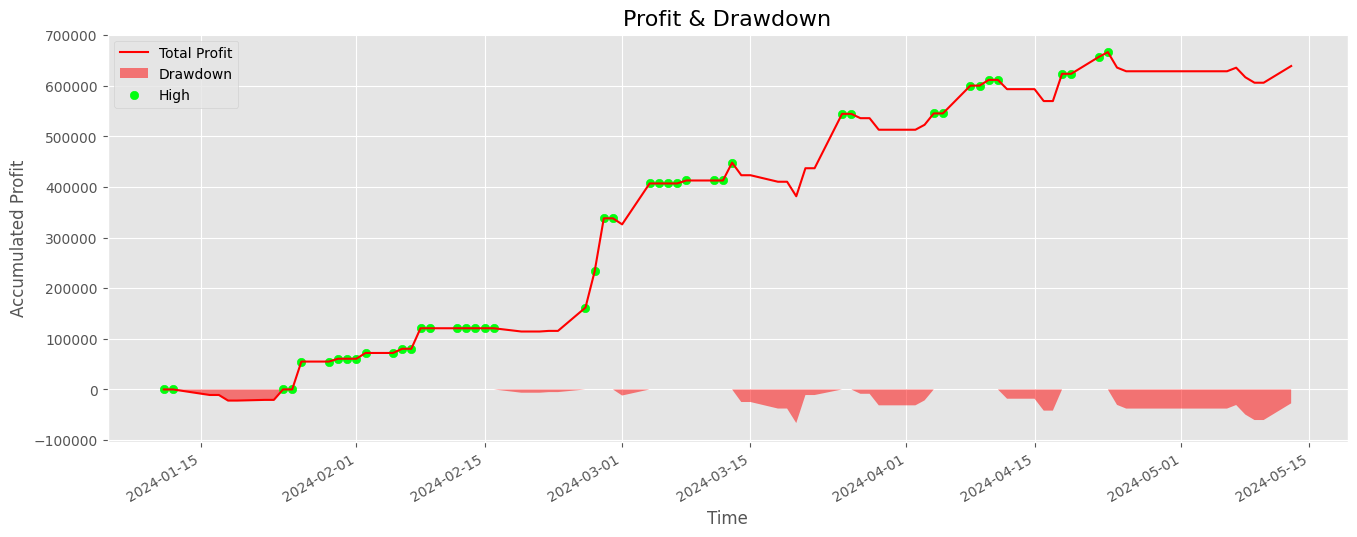

In [86]:
fig, ax = plt.subplots(figsize = (16,6))
high_index = equity[equity['profitfee'].cummax() == equity['profitfee']].index
equity['profitfee'].plot(label = 'Total Profit', ax = ax, c = 'r', grid=True)
plt.fill_between(equity['drawdown'].index, equity['drawdown'], 0, facecolor  = 'r', label = 'Drawdown', alpha=0.5)
plt.scatter(high_index, equity['profitfee'].loc[high_index],c = '#02ff0f', label = 'High')

plt.legend()
plt.ylabel('Accumulated Profit')
plt.xlabel('Time')
plt.title('Profit & Drawdown',fontsize  = 16);


In [87]:
# trade_date = date2num(data2.index)
# trade_date = [(trade_date[i], data2['Close'].iloc[i], data2['High'].iloc[i], data2['Low'].iloc[i], data2['Open'].iloc[i], data2['Volume'].iloc[i]) for i in range(len(trade_date))]


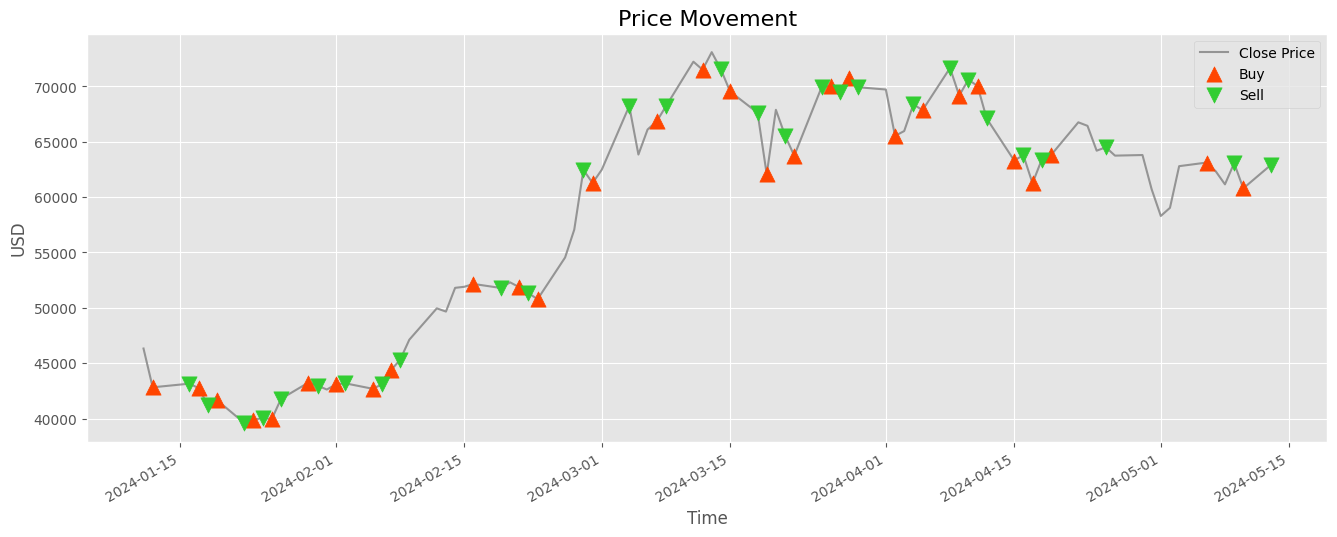

In [88]:
fig, ax = plt.subplots(figsize=(16, 6))

trade['Close'].plot(label='Close Price', ax=ax, c='gray', grid=True, alpha=0.8)
plt.scatter(trade['Close'].iloc[buy].index, trade['Close'].iloc[buy], c='orangered', label='Buy', marker='^', s=120, zorder=50)
plt.scatter(trade['Close'].iloc[sell].index, trade['Close'].iloc[sell], c='limegreen', label='Sell', marker='v', s=120, zorder=50)
# candlestick_ochl(ax, trade_date, colorup = 'g', colordown = 'r', width = 0.8)

plt.legend()
plt.ylabel('USD')
plt.xlabel('Time')
plt.title('Price Movement', fontsize=16)
plt.show()

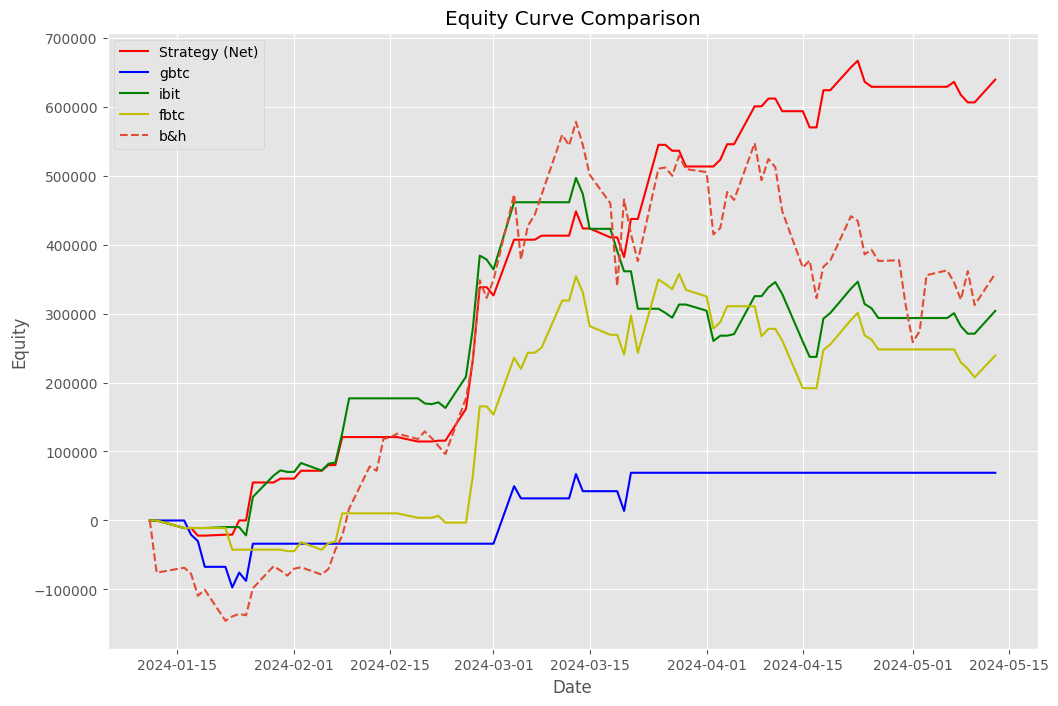

In [89]:
plt.figure(figsize=(12, 8))
plt.plot(equity['profitfee'], label = 'Strategy (Net)', color = 'r')
plt.plot(equity1['profitfee'], label = 'gbtc', color = 'b' )
plt.plot(equity2['profitfee'], label = 'ibit', color = 'g' )
plt.plot(equity3['profitfee'], label = 'fbtc', color = 'y' )
plt.plot(equity['buy_and_hold']-fund, label = 'b&h', linestyle = '--')
plt.title('Equity Curve Comparison')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.legend()
plt.grid(True)
plt.show()